**Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

Here you will be learning how to do data cleaning.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_excel('Week1_challenge_data_source.xlsx', na_values=['?', None])
db.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   9164566995485190             42.0              5.0   
1            L77566A             65.0              5.0   
2            D42335A              NaN              NaN   
3            T21824A              NaN              NaN   
4            D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0      

Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [3]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

For better understanding of the columns, exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [4]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


#### Data cleaning utils

In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

##### Handling Missing Values

In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 12.49 % missing values.


In [7]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [8]:
df_clean = db.copy()
# drop columns with more than 30% missing values: meaning 50 thousand missing and plus
# df_clean = db.drop(["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", "HTTP DL (Bytes)", "HTTP UL (Bytes)", "Nb of sec with 125000B < Vol DL", "Nb of sec with 1250B < Vol UL < 6250B", "Nb of sec with 31250B < Vol DL < 125000B", "Nb of sec with 37500B < Vol UL", "Nb of sec with 6250B < Vol DL < 31250B", "Nb of sec with 6250B < Vol UL < 37500B"], axis=1)
# df_clean.shape



In [9]:
missing_values_table(df_clean)

Your selected dataframe has 55 columns.
There are 40 columns that have missing values.


Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)                                    27829               18.6   
Avg RTT UL (ms)                                    27812               18.5   
Last Location Name                                  1153                0.8   
MSISDN/Number                                       1066                0.7   
Nb of sec with Vol UL < 1250B                        793                0.5   
UL TP < 10 Kbps (%)                                  792                0.5   
UL TP > 300 Kbps (%)                                 792                0.5   
50 Kbps < UL TP < 300 Kbps (%)                       792                0.5   
10 Kbps < UL TP < 50 Kbps (%)                        792                0.5   
Nb of sec with Vol DL < 6250B                        755                0.5   
DL TP > 1 Mbps (%)                                   754                0.5   
250 Kbps < DL TP < 1 Mbps (%)                        754                0.5   
50 Kbps < DL TP < 250 Kbps (%)                       754                0.5   
DL TP < 50 Kbps (%)                                  754                0.5   
Handset Type                                         572                0.4   
IMEI                                                 572                0.4   
Handset Manufacturer                                 572                0.4   
IMSI                                                 570                0.4   
Total UL (Bytes)                                       1                0.0   
Start                                                  1                0.0   
Dur. (ms).1                                            1                0.0   
Activity Duration UL (ms)                              1                0.0   
Activity Duration DL (ms)                              1                0.0   
Start ms                                               1                0.0   
Avg Bearer TP UL (kbps)                                1                0.0   
Avg Bearer TP DL (kbps)                                1                0.0   
Dur. (ms)                                              1                0.0   
End ms                                                 1                0.0   
End                                                    1                0.0   
Total DL (Bytes)                                       1                0.0   

                                                   Dtype  
Nb of sec with 37500B < Vol UL                   float64  
Nb of sec with 6250B < Vol UL < 37500B           float64  
Nb of sec with 125000B < Vol DL                  float64  
TCP UL Retrans. Vol (Bytes)                      float64  
Nb of sec with 31250B < Vol DL < 125000B         float64  
Nb of sec with 1250B < Vol UL < 6250B            float64  
Nb of sec with 6250B < Vol DL < 31250B           float64  
TCP DL Retrans. Vol (Bytes)                      float64  
HTTP UL (Bytes)                                  float64  
HTTP DL (Bytes)                                  float64  
Avg RTT DL (ms)                                  float64  
Avg RTT UL (ms)                                  float64  
Last Location Name                 

In [10]:
# Checking that those columns are droped

df_clean.isna().sum()   

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [12]:
# Filling missings with column average
df_clean = df_clean.fillna(df_clean.mean())

##### Fixing outliers

In [13]:
df_clean["Google DL (Bytes)"] = fix_outlier(df_clean, "Google DL (Bytes)")
df_clean["Google UL (Bytes)"] = fix_outlier(df_clean, "Google UL (Bytes)")
df_clean["Email DL (Bytes)"] = fix_outlier(df_clean, "Email DL (Bytes)")
df_clean["Email UL (Bytes)"] = fix_outlier(df_clean, "Email UL (Bytes)")

df_clean["Youtube DL (Bytes)"] = fix_outlier(df_clean, "Youtube DL (Bytes)")
df_clean["Youtube UL (Bytes)"] = fix_outlier(df_clean, "Youtube UL (Bytes)")

df_clean["Netflix DL (Bytes)"] = fix_outlier(df_clean, "Netflix DL (Bytes)")
df_clean["Netflix UL (Bytes)"] = fix_outlier(df_clean, "Netflix UL (Bytes)")

df_clean["Gaming DL (Bytes)"] = fix_outlier(df_clean, "Gaming DL (Bytes)")
df_clean["Gaming UL (Bytes)"] = fix_outlier(df_clean, "Gaming UL (Bytes)")

df_clean["Other DL (Bytes)"] = fix_outlier(df_clean, "Other DL (Bytes)")
df_clean["Other UL (Bytes)"] = fix_outlier(df_clean, "Other UL (Bytes)")

In [14]:
df_clean["Avg RTT DL (ms)"] = fix_outlier(df_clean, "Avg RTT DL (ms)")
df_clean["Avg RTT UL (ms)"] = fix_outlier(df_clean, "Avg RTT UL (ms)")
df_clean["Avg Bearer TP DL (kbps)"] = fix_outlier(df_clean, "Avg Bearer TP DL (kbps)")
df_clean["Avg Bearer TP UL (kbps)"] = fix_outlier(df_clean, "Avg Bearer TP UL (kbps)")

df_clean["Total UL (Bytes)"] = fix_outlier(df_clean, "Total UL (Bytes)")
df_clean["Total DL (Bytes)"] = fix_outlier(df_clean, "Total DL (Bytes)")

In [15]:
df_clean.describe()

Start ms         End ms     Dur. (ms)          IMSI  \
count  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
std       288.610872     288.096693  8.103735e+04  2.144722e+10   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744200e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324300e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13        64.502668        10.440744   
std     2.438731e+12  2.237359e+13        38.469858         9.169703   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365151e+10  3.546261e+13        35.000000         3.000000   
50%     3.366380e+10  3.572241e+13        54.000000         7.000000   
75%     3.368473e+10  8.611970e+13       106.000000        17.662883   
max     8.823971e+14  9.900120e+13       227.000000        44.000000   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count            150001.000000            150001.000000   
mean               8885.019374               825.942517   
std               15604.802008              1715.491430   
min                   0.000000                 0.000000   
25%                  43.000000                47.000000   
50%                  63.000000                63.000000   
75%               12495.000000               767.000000   
max               62544.000000             10557.000000   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                 1.500010e+05                 1.500010e+05   
mean                  2.080991e+07                 7.596587e+05   
std                   1.172356e+08                 1.577616e+07   
min                   2.000000e+00                 1.000000e+00   
25%                   1.332932e+06                 6.300900e+04   
50%                   2.080991e+07                 7.596587e+05   
75%                   2.080991e+07                 7.596587e+05   
max                   4.294426e+09                 2.908226e+09   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count        150001.000000                   150001.000000   
mean             92.844754                        3.069355   
std              13.005221                        6.199592   
min               0.000000                        0.000000   
25%              91.000000                        0.000000   
50%             100.000000                        0.000000   
75%             100.000000                        4.000000   
max             100.000000                       93.000000   

       250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
count                  150001.000000       150001.000000        150001.000000   
mean                        1.717341            1.609654            98.530142   
std                         4.149070            4.816738             4.622035   
min                         0.000000            0.000000             0.000000   
25%                         0.000000            0.000000            99.000000   
50%                         0.000000            0.000000           100.000000   
75%                         1.000000            1.000000           100.000000   
max                       100.000000           94.000000           100.000000   

       10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
count                  150001.000000                   150001.000000   
mean                        0.776749                        0.147987   
std                         3.216651                        1.620229   
min                         0.000000          

#### Transforming Data: Scaling data

Scaling: changing the range of your data, while

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler()
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total UL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total UL (Bytes)']])

# df_clean[['Avg RTT DL (ms']] = minmax_scaler.fit_transform(df_clean[['Avg RTT DL (ms']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])
# df_clean[['Total DL (Bytes)']] = minmax_scaler.fit_transform(df_clean[['Total DL (Bytes)']])


(array([15077., 14936., 14861., 15177., 15038., 14896., 15182., 14961.,
        14933., 14940.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

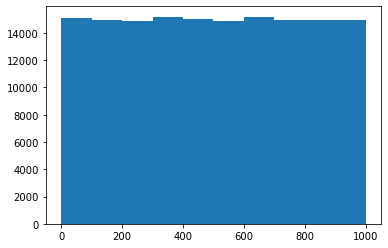

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df_clean['Start ms'])

## Task 1 - User Overview analysis 


##### 1. Start by identifying the top 10 handsets used by the customers.

*  Variables:  Handset Type

In [18]:
Top10_Handset=df_clean['Handset Type'].value_counts()
Top10_Handset.head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

#### 2. Then, identify the top 3 handset manufacturers: Handsets frequencies and get top 3

* Variables:         Handset Manufacturer




In [19]:
Top3_Handset_Manufacturer=df_clean['Handset Manufacturer'].value_counts()
Top3_Handset_Manufacturer

Apple                                            59565
Samsung                                          40839
Huawei                                           34423
undefined                                         8987
Sony Mobile Communications Ab                      980
                                                 ...  
Pt. Arga Mas Lestari                                 1
Hewlett-Packard                                      1
Ck Telecom Limited                                   1
Shenzhen Huadoo Bright Group Limited                 1
Shenzhen City Ramos Digital Technology Co Ltd        1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [20]:
Top3_Handset_Manufacturer.head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

#### 3. Next, identify the top 5 handsets per top 3 handset manufacturer
* Variables: Handset Type and Handset Manufacturer

* Creating subdasets for top 3 manufacturers


In [21]:
Top3HandsetApple = df_clean.loc[df_clean['Handset Manufacturer'] == "Apple"]
Top3HandsetSamsung = df_clean.loc[df_clean['Handset Manufacturer'] == "Samsung"]
Top3HandsetHuawei = df_clean.loc[df_clean['Handset Manufacturer'] == "Huawei"]
Top3HandsetHuawei.head()

Bearer Id               Start  Start ms                 End  \
6   13114483501243799552 2019-04-13 08:41:59     612.0 2019-04-25 08:16:21   
11  13114483557479700480 2019-04-15 11:33:39     626.0 2019-04-25 18:44:14   
20  13042425955912400896 2019-04-17 00:35:20     363.0 2019-04-25 04:52:49   
25  13114483519088500736 2019-04-17 10:17:52      47.0 2019-04-24 23:27:28   
30  13042425955912400896 2019-04-18 00:35:20     711.0 2019-04-25 04:52:49   

    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
6    168.0  1035261.0  2.082014e+14   3.366537e+10  8.676270e+13   
11   542.0   889834.0  2.082019e+14   3.366447e+10  8.600910e+13   
20   691.0   706649.0  2.082010e+14   3.365875e+10  8.654080e+13   
25   907.0   652176.0  2.082017e+14   3.377042e+10  8.690840e+13   
30   691.0   620248.0  2.082010e+14   3.365875e+10  8.654080e+13   

   Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
6    9164567010589190            102.0              5.0   
11            T21335C            217.0              4.0   
20            T29714B             54.0             43.0   
25            T76876B             63.0              4.0   
30            T29714B             54.0             22.0   

    Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
6                      22.0                     38.0   
11                  28305.0                   6500.0   
20                  29501.0                  10557.0   
25                     22.0                     35.0   
30                  26037.0                   7205.0   

    TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
6                  2.080991e+07                759658.664811   
11                 5.722628e+06                312007.000000   
20                 9.844005e+06                 21586.000000   
25                 2.080991e+07                759658.664811   
30                 1.314424e+07                759658.664811   

    DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
6                 100.0                             0.0   
11                 68.0                            17.0   
20                 91.0                             4.0   
25                100.0                             0.0   
30                 89.0                             5.0   

    250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
6                             0.0                 0.0                100.0   
11                            7.0                 5.0                 98.0   
20                            1.0                 1.0                 98.0   
25                            0.0                 0.0                100.0   
30                            2.0                 2.0                 98.0   

    10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
6                             0.0                             0.0   
11                            1.0                             0.0   
20                            0.0                             0.0   
25                            0.0                             0.0   
30                            1.0                             0.0   

    UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
6                    0.0     1.144710e+08     3.242301e+06   
11                   0.0     3.598630e+07     6.890040e+05   
20                   0.0     9.059559e+06     1.400957e+06   
25                   0.0     1.144710e+08     3.242301e+06   
30                   0.0     1.603370e+06     2.479970e+05   

    Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
6                      9785.0                   316210.0  1.035262e+09   
11                  2623085.0                  2632442.0  8.898349e+08   
20                  3813488.0                  2505174.0  7.066493e+08   
25                     1109.0                    47589.0  6.521769e+08   
30                  2131832.0                  1606322.0  6.202490e+08   

   

In [22]:
# Top 5 handsets for Apple
Top3HandsetApple['Handset Type'].value_counts().head(5)


Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [23]:
# Top 5 handsets for Samsung
Top3HandsetSamsung['Handset Type'].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [24]:
# Top 5 handsets for Huawei
Top3HandsetHuawei['Handset Type'].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

#### 4. Make a short interpretation and recommendation to marketing teams

The top 3 manufactutrers of handsets are: Apple, Samsung and Huawei.
The Apple produced 59565 handsets, mainly being for Apple iPhone 6S (A1688) and Apple iPhone 6 (A1586)   with  9419 and 9023 products respectively.

The Samsung  produced 40839 handsets, dominated mainly by Samsung Galaxy S8 (Sm-G950F) and Samsung Galaxy A5 Sm-A520F  with 4520 and 3724 produced respectively.
The third one, was Huawei which produced 34423 handsets, with Huawei B528S-23A  and Huawei E5180 being main produced counting for 19752 and 2079 respectively.

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications. 

#### Aggregate per user the following information in the column


* number of xDR sessions per users


* Session duration per users


In [25]:
# bearer id	xDr session identifier
df_clean.groupby("MSISDN/Number")['Bearer Id'].count()

MSISDN/Number
3.360100e+10       1
3.360100e+10       1
3.360100e+10       1
3.360101e+10       1
3.360101e+10       2
                ... 
3.379000e+10       1
4.188282e+10    1066
3.197021e+12       1
3.370000e+14       1
8.823971e+14       1
Name: Bearer Id, Length: 106857, dtype: int64

In [26]:
df_clean.groupby("MSISDN/Number")['Bearer Id'].describe()

count unique                   top freq
MSISDN/Number                                        
3.360100e+10      1      1  13114483554762799104    1
3.360100e+10      1      1   7349883260786089984    1
3.360100e+10      1      1   7349883263388680192    1
3.360101e+10      1      1  13042425972781099008    1
3.360101e+10      2      2   7277825655840339968    1
...             ...    ...                   ...  ...
3.379000e+10      1      1  13114483558421200896    1
4.188282e+10   1066    502                        562
3.197021e+12      1      1   7277825624788950016    1
3.370000e+14      1      1   7349883258102979584    1
8.823971e+14      1      1   7277825601573409792    1

[106857 rows x 4 columns]

In [27]:
df_clean["MSISDN/Number"].describe()

count    1.500010e+05
mean     4.188282e+10
std      2.438731e+12
min      3.360100e+10
25%      3.365151e+10
50%      3.366380e+10
75%      3.368473e+10
max      8.823971e+14
Name: MSISDN/Number, dtype: float64


* the total download (DL) and upload (UL) data per Users


In [28]:
# TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
# TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)


# Avg RTT DL (ms) 
# Avg RTT UL (ms)
df_clean.groupby("MSISDN/Number")['Avg RTT DL (ms)'].mean()

MSISDN/Number
3.360100e+10     46.000000
3.360100e+10     30.000000
3.360100e+10    109.795706
3.360101e+10     69.000000
3.360101e+10     57.000000
                   ...    
3.379000e+10     34.000000
4.188282e+10     77.275990
3.197021e+12    109.795706
3.370000e+14    109.795706
8.823971e+14    109.795706
Name: Avg RTT DL (ms), Length: 106857, dtype: float64

In [29]:
df_clean['Avg RTT DL (ms)'].describe()

count    150001.000000
mean         64.502668
std          38.469858
min           0.000000
25%          35.000000
50%          54.000000
75%         106.000000
max         227.000000
Name: Avg RTT DL (ms), dtype: float64

In [30]:
df_clean.groupby("MSISDN/Number")['Avg RTT UL (ms)'].mean()

MSISDN/Number
3.360100e+10     0.000000
3.360100e+10     1.000000
3.360100e+10    17.662883
3.360101e+10    15.000000
3.360101e+10     2.500000
                  ...    
3.379000e+10     6.000000
4.188282e+10    11.896772
3.197021e+12    17.662883
3.370000e+14    17.662883
8.823971e+14    17.662883
Name: Avg RTT UL (ms), Length: 106857, dtype: float64

In [31]:
df_clean['Avg RTT UL (ms)'].describe()

count    150001.000000
mean         10.440744
std           9.169703
min           0.000000
25%           3.000000
50%           7.000000
75%          17.662883
max          44.000000
Name: Avg RTT UL (ms), dtype: float64

In [32]:
df_clean.groupby("MSISDN/Number")['Avg Bearer TP DL (kbps)'].mean()

MSISDN/Number
3.360100e+10       37.000000
3.360100e+10       48.000000
3.360100e+10       48.000000
3.360101e+10      204.000000
3.360101e+10    20197.500000
                    ...     
3.379000e+10       68.000000
4.188282e+10    11396.433439
3.197021e+12        1.000000
3.370000e+14       11.000000
8.823971e+14        2.000000
Name: Avg Bearer TP DL (kbps), Length: 106857, dtype: float64

In [33]:
df_clean.groupby("MSISDN/Number")['Avg Bearer TP UL (kbps)'].mean()

MSISDN/Number
3.360100e+10      39.000000
3.360100e+10      51.000000
3.360100e+10      49.000000
3.360101e+10      44.000000
3.360101e+10      51.500000
                   ...     
3.379000e+10      48.000000
4.188282e+10    1046.184267
3.197021e+12       0.000000
3.370000e+14      22.000000
8.823971e+14       0.000000
Name: Avg Bearer TP UL (kbps), Length: 106857, dtype: float64


* the total data volume (in Bytes) during this session for each application per Users

In [34]:
# Variables: 
# Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
# Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)

df_clean.groupby("MSISDN/Number")['Total DL (Bytes)'].sum()

MSISDN/Number
3.360100e+10    4.558409e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    4.445751e+08
4.188282e+10    4.650024e+11
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106857, dtype: float64

In [35]:
df_clean['Total DL (Bytes)'].describe()

count    1.500010e+05
mean     4.346131e+08
std      2.261013e+08
min      7.114041e+06
25%      2.431072e+08
50%      4.558409e+08
75%      6.232560e+08
max      8.342894e+08
Name: Total DL (Bytes), dtype: float64

In [36]:
df_clean.groupby("MSISDN/Number")['Total UL (Bytes)'].sum()

MSISDN/Number
3.360100e+10    3.605311e+07
3.360100e+10    3.610446e+07
3.360100e+10    3.930682e+07
3.360101e+10    2.032753e+07
3.360101e+10    9.428053e+07
                    ...     
3.379000e+10    3.573224e+07
4.188282e+10    4.318604e+10
3.197021e+12    3.729592e+07
3.370000e+14    5.665284e+07
8.823971e+14    4.114324e+07
Name: Total UL (Bytes), Length: 106857, dtype: float64

In [37]:
df_clean['Total UL (Bytes)'].describe()

count    1.500010e+05
mean     3.999088e+07
std      9.986794e+06
min      2.866892e+06
25%      3.322203e+07
50%      4.114324e+07
75%      4.728190e+07
max      5.973914e+07
Name: Total UL (Bytes), dtype: float64

Fields	Description
bearer id	xDr session identifier
Dur. (ms)	Total Duration of the xDR (in ms)


In [38]:
df_clean["Bearer Id"].value_counts()

                        991
13042425979269199872     16
13042425965944199168     10
13042425972278300672      9
13042425978774599680      9
                       ... 
13042425959245500416      1
13114483564761300992      1
7277825665743110144       1
7277825669917429760       1
13114483555887499264      1
Name: Bearer Id, Length: 134709, dtype: int64

In [39]:
df_clean["Bearer Id"].describe()

count     150001
unique    134709
top             
freq         991
Name: Bearer Id, dtype: object

### Task 1.2 - Conduct an exploratory data analysis on those data

* Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

#### Utils

In [40]:
###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(20, 15))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.4f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()
    
pd.options.display.float_format = format_float

#### You’re expected to report about the following using  python script and slide  :


* Describe all  relevant variables and associated data types (slide). 


* Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [41]:
df_clean.describe()

Start ms     End ms    Dur. (ms)                   IMSI  \
count 150,001.00 150,001.00   150,001.00             150,001.00   
mean      499.19     498.80   104,608.56 208,201,639,651,673.78   
std       288.61     288.10    81,037.35      21,447,224,608.90   
min         0.00       0.00     7,142.00 204,047,108,489,451.00   
25%       250.00     251.00    57,442.00 208,201,401,264,956.00   
50%       499.00     500.00    86,399.00 208,201,546,359,072.00   
75%       749.00     750.00   132,430.00 208,201,771,607,314.00   
max       999.00     999.00 1,859,336.00 214,074,303,349,628.00   

               MSISDN/Number                  IMEI  Avg RTT DL (ms)  \
count             150,001.00            150,001.00       150,001.00   
mean       41,882,819,545.03 48,474,547,977,653.76            64.50   
std     2,438,731,270,479.18 22,373,590,654,759.30            38.47   
min        33,601,001,722.00    440,015,202,000.00             0.00   
25%        33,651,508,781.00 35,462,609,538,986.00            35.00   
50%        33,663,797,508.00 35,722,409,972,293.00            54.00   
75%        33,684,730,950.00 86,119,704,277,453.00           106.00   
max   882,397,108,489,451.00 99,001,201,327,774.00           227.00   

       Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count       150,001.00               150,001.00               150,001.00   
mean             10.44                 8,885.02                   825.94   
std               9.17                15,604.80                 1,715.49   
min               0.00                     0.00                     0.00   
25%               3.00                    43.00                    47.00   
50%               7.00                    63.00                    63.00   
75%              17.66                12,495.00                   767.00   
max              44.00                62,544.00                10,557.00   

       TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
count                   150,001.00                   150,001.00   
mean                 20,809,914.27                   759,658.66   
std                 117,235,576.02                15,776,162.06   
min                           2.00                         1.00   
25%                   1,332,932.00                    63,009.00   
50%                  20,809,914.27                   759,658.66   
75%                  20,809,914.27                   759,658.66   
max               4,294,425,570.00             2,908,226,006.00   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count           150,001.00                      150,001.00   
mean                 92.84                            3.07   
std                  13.01                            6.20   
min                   0.00                            0.00   
25%                  91.00                            0.00   
50%                 100.00                            0.00   
75%                 100.00                            4.00   
max                 100.00                           93.00   

       250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
count                     150,001.00          150,001.00           150,001.00   
mean                            1.72                1.61                98.53   
std                             4.15                4.82                 4.62   
min                             0.00                0.00                 0.00   
25%                             0.00                0.00                99.00   
50%                             0.00                0.00               100.00   
75%                             1.00                1.00               100.00   
max                           100.00               94.00               100.00   

       10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
count                     150,001.00                      150,001.00   
mean                            0.78      

* Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [42]:
Relevant_df_clean = df_clean[["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]]
Relevant_df_clean.describe()

Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
count         150,001.00         150,001.00        150,001.00   
mean        5,480,234.60       1,958,549.53      1,706,572.87   
std         3,066,559.17       1,102,020.11        959,294.59   
min               207.00               3.00             14.00   
25%         2,882,393.00       1,024,279.00        892,793.00   
50%         5,765,829.00       2,054,573.00      1,793,505.00   
75%         8,061,127.00       2,878,956.00      2,511,516.00   
max        10,886,474.00       3,910,628.00      3,406,776.00   

       Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count        150,001.00          150,001.00          150,001.00   
mean         445,027.91       11,081,147.95       10,487,408.69   
std          249,877.33        6,214,944.41        5,876,459.02   
min                2.00               53.00              105.00   
25%          233,383.00        5,833,501.00        5,517,965.00   
50%          466,250.00       11,616,019.00       11,013,447.00   
75%          653,042.00       16,290,002.00       15,414,734.00   
max          889,979.00       22,077,016.00       20,898,120.00   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count          150,001.00          150,001.00         150,001.00   
mean        11,075,446.16       10,478,314.74     402,094,351.88   
std          6,230,618.07        5,889,803.75     226,052,955.82   
min                 42.00               35.00           2,516.00   
25%          5,777,156.00        5,475,981.00     210,473,253.00   
50%         11,642,217.00       10,996,384.00     423,408,104.00   
75%         16,290,947.00       15,412,679.00     590,639,105.00   
max         22,074,007.00       20,911,864.00     801,527,020.00   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
count         150,001.00        150,001.00        150,001.00  
mean        7,895,643.47    401,086,241.74      7,871,300.38  
std         4,430,545.47    225,168,728.42      4,414,397.56  
min                59.00          3,290.00            148.00  
25%         4,128,476.00    210,186,872.00      4,145,943.00  
50%         8,291,208.00    421,803,006.00      8,267,071.00  
75%        11,604,440.00    588,905,875.00     11,543,900.00  
max        15,731,881.00    800,830,535.00     15,718,747.00

##### Graphical representation of data

* Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

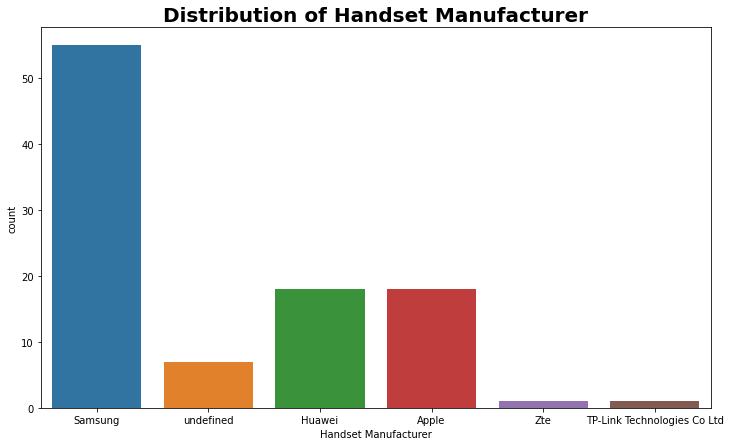

In [43]:
# Randomly selecting some rows for visualization
#plot_count(df_clean.sample(n=100), "Handset Manufacturer")
plot_count(df_clean.head(100), "Handset Manufacturer")

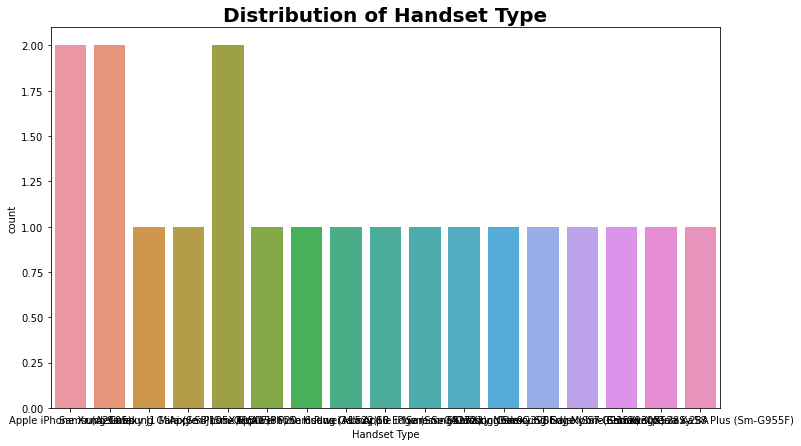

In [44]:
plot_count(df_clean.sample(20), "Handset Type")

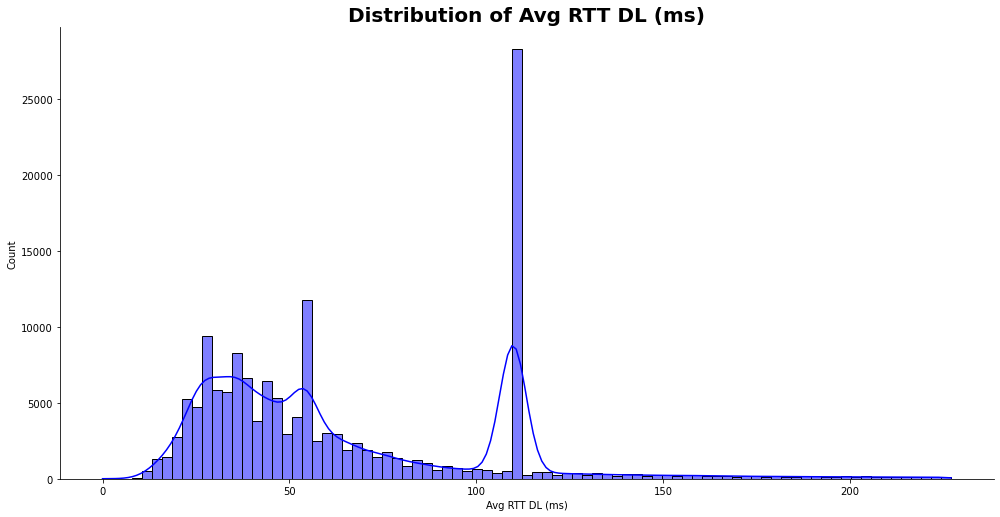

In [45]:
plot_hist(df_clean, "Avg RTT DL (ms)", "blue")


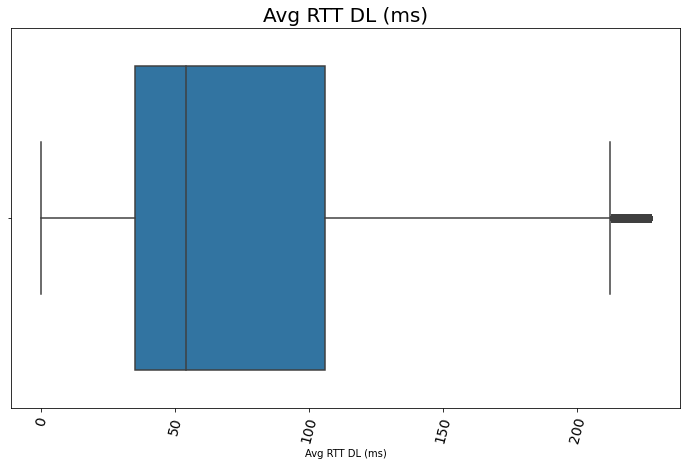

In [46]:
plot_box(df_clean, "Avg RTT DL (ms)", "Avg RTT DL (ms)")

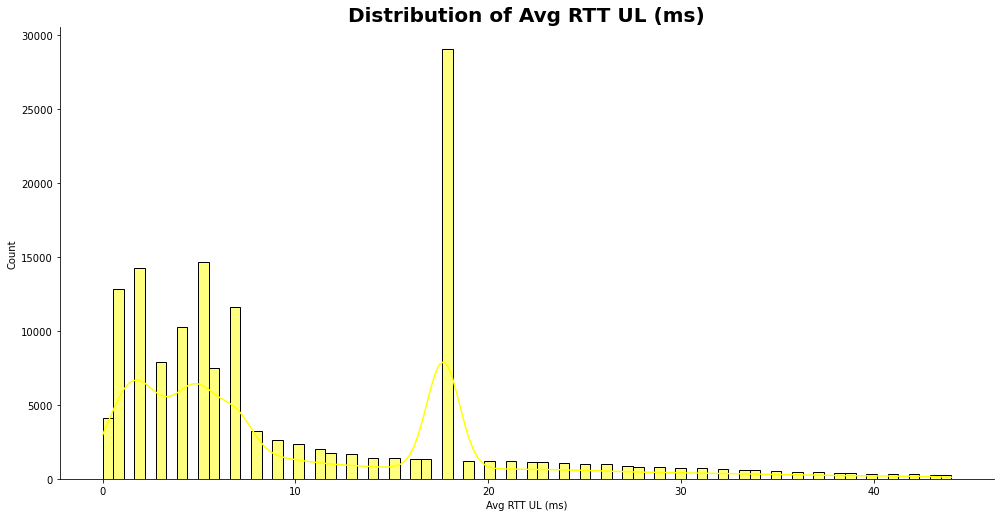

In [47]:
plot_hist(df_clean, "Avg RTT UL (ms)", "yellow")

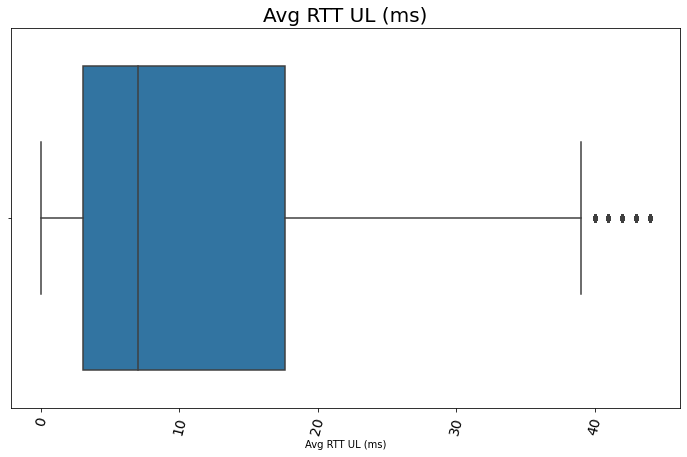

In [48]:
plot_box(df_clean, "Avg RTT UL (ms)", "Avg RTT UL (ms)")

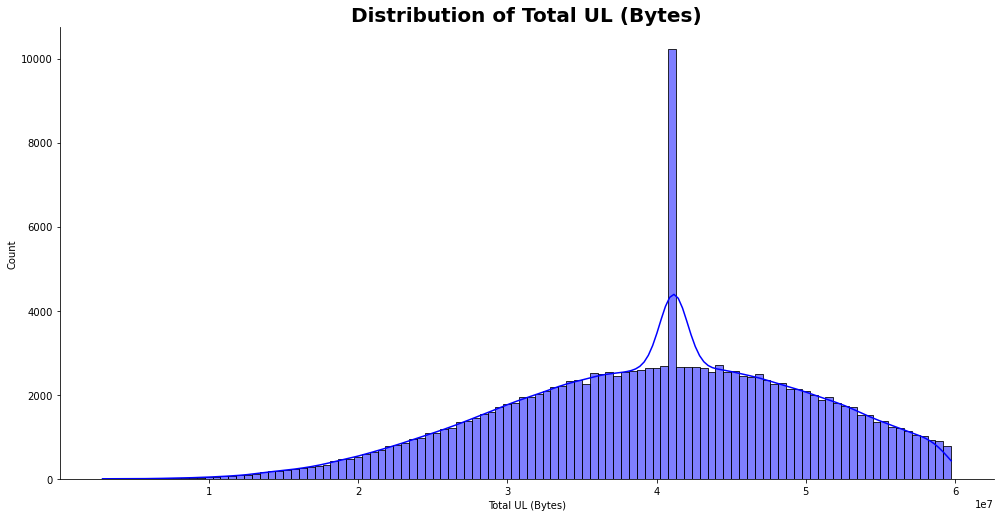

In [49]:
plot_hist(df_clean, "Total UL (Bytes)", "blue")

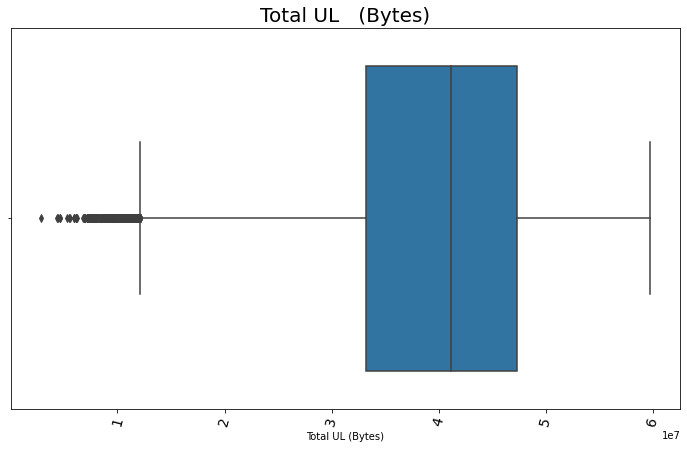

In [50]:
plot_box(df_clean, "Total UL (Bytes)", "Total UL   (Bytes)")

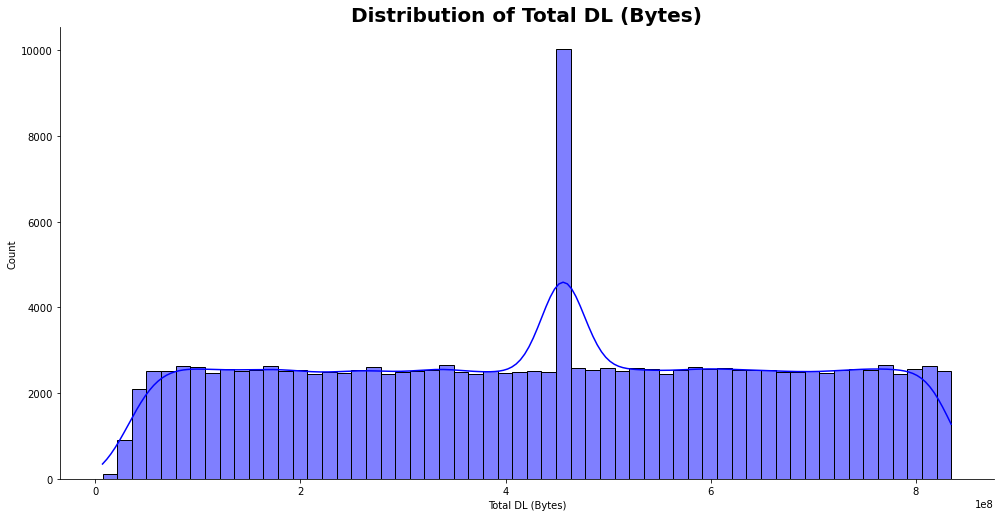

In [51]:
plot_hist(df_clean, "Total DL (Bytes)", "blue")

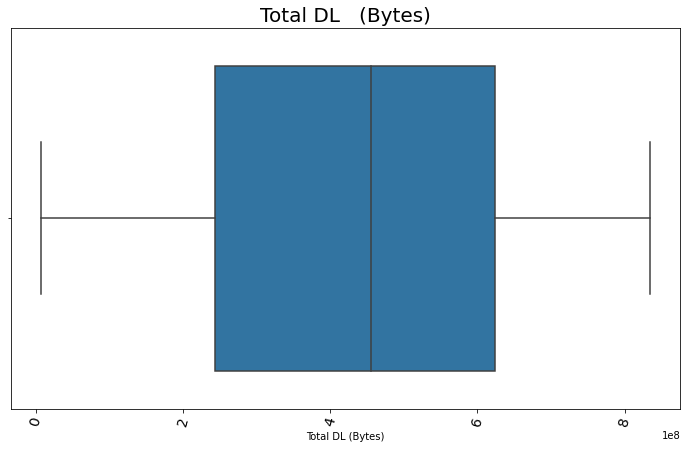

In [52]:
plot_box(df_clean, "Total DL (Bytes)", "Total DL   (Bytes)")

#### Additional data analysis and visualizations

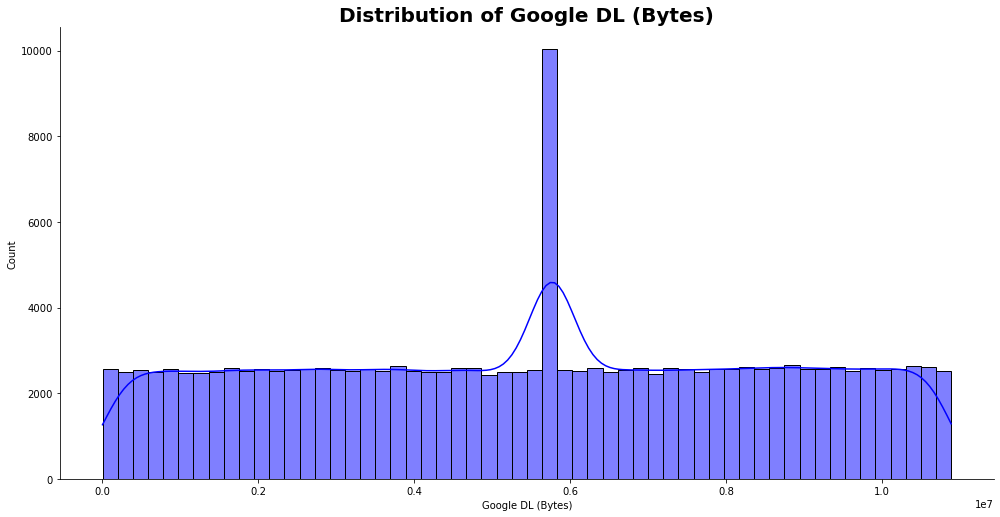

In [53]:
plot_hist(df_clean, "Google DL (Bytes)", "blue")

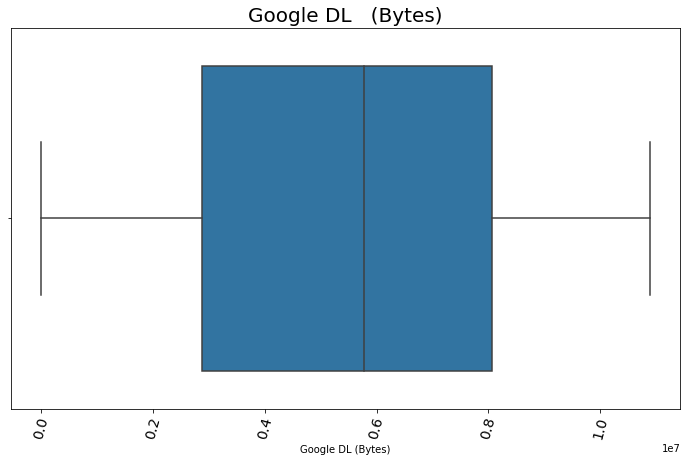

In [54]:
plot_box(df_clean, "Google DL (Bytes)", "Google DL   (Bytes)")

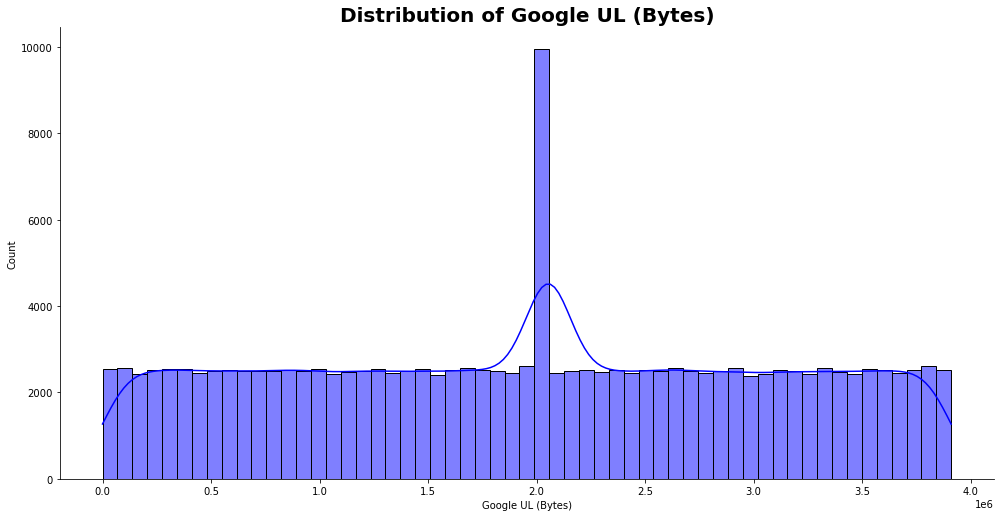

In [55]:
plot_hist(df_clean, "Google UL (Bytes)", "blue")

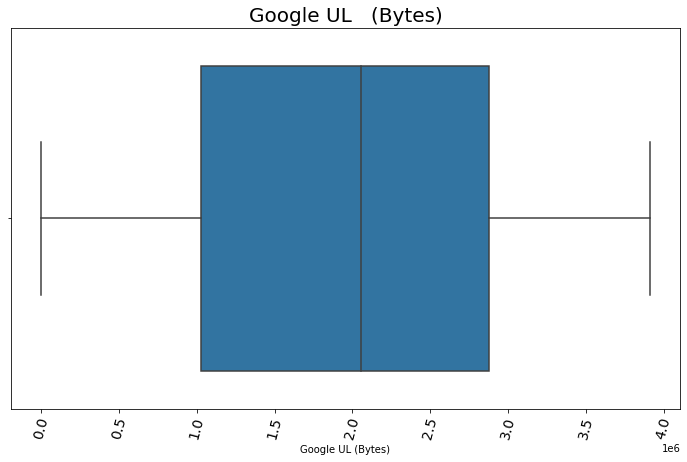

In [56]:
plot_box(df_clean, "Google UL (Bytes)", "Google UL   (Bytes)")

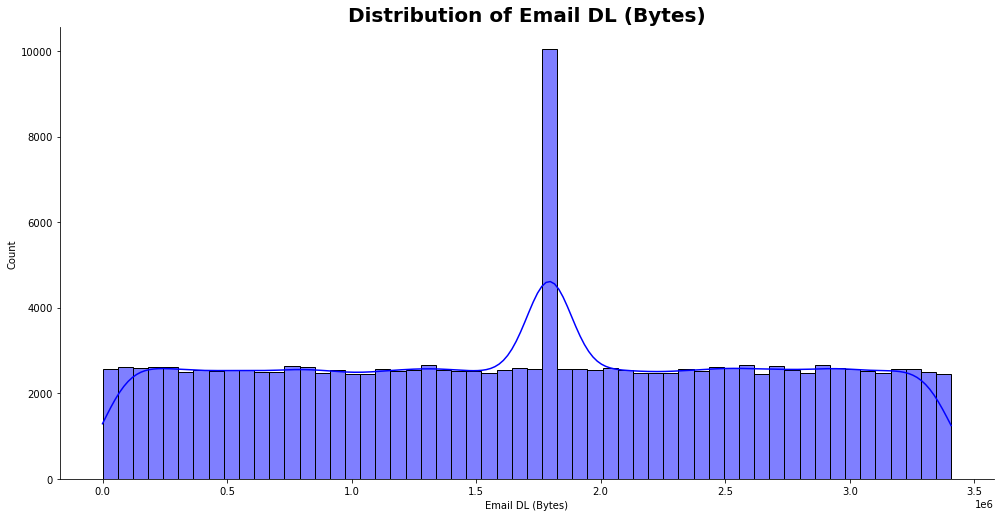

In [57]:
plot_hist(df_clean, "Email DL (Bytes)", "blue")

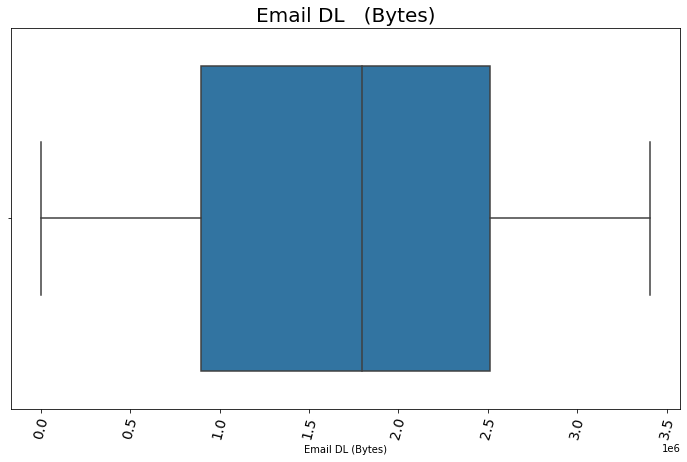

In [58]:
plot_box(df_clean, "Email DL (Bytes)", "Email DL   (Bytes)")

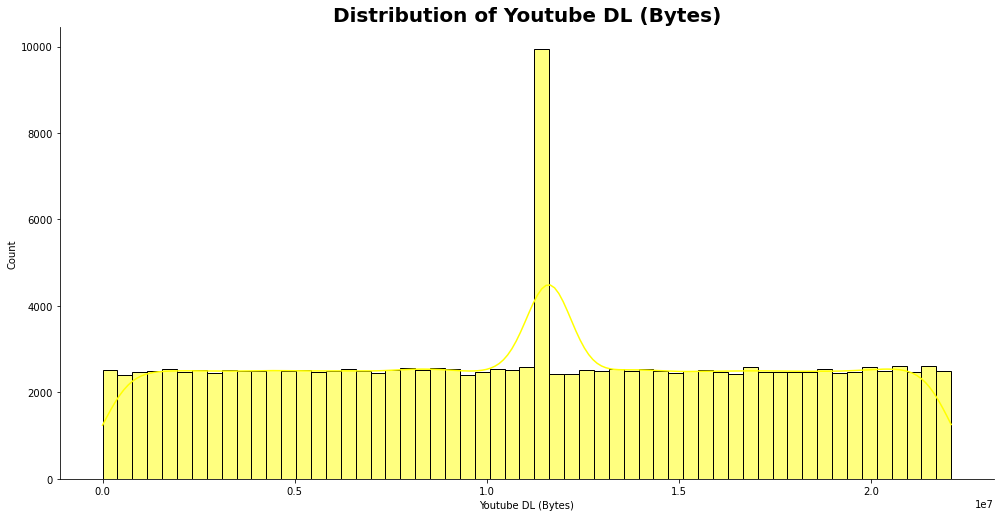

In [59]:
plot_hist(df_clean, "Youtube DL (Bytes)", "yellow")

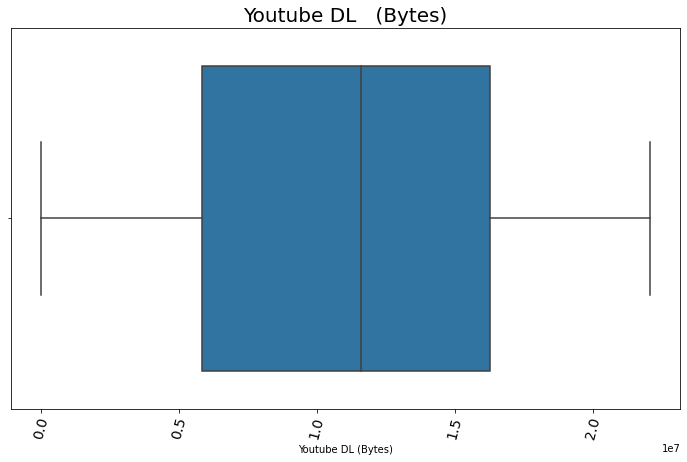

In [60]:
plot_box(df_clean, "Youtube DL (Bytes)", "Youtube DL   (Bytes)")

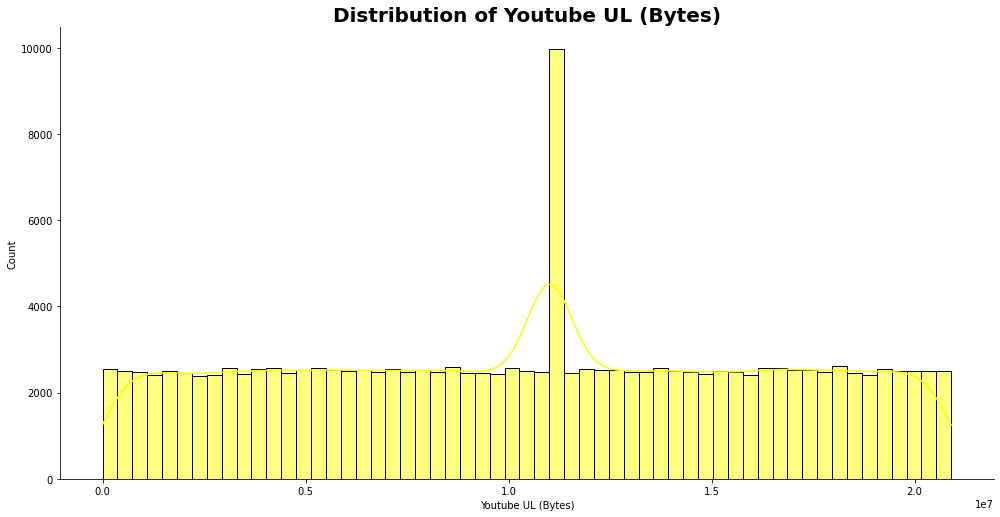

In [61]:
plot_hist(df_clean, "Youtube UL (Bytes)", "yellow")

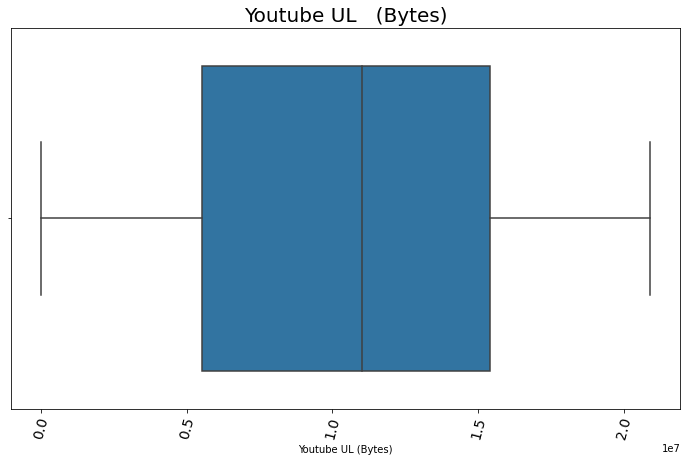

In [62]:
plot_box(df_clean, "Youtube UL (Bytes)", "Youtube UL   (Bytes)")

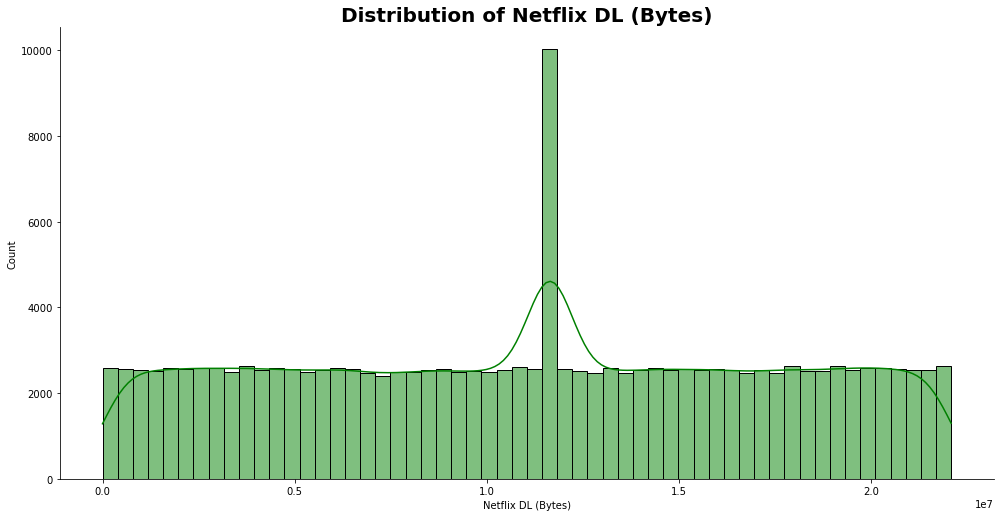

In [63]:
plot_hist(df_clean, "Netflix DL (Bytes)", "green")

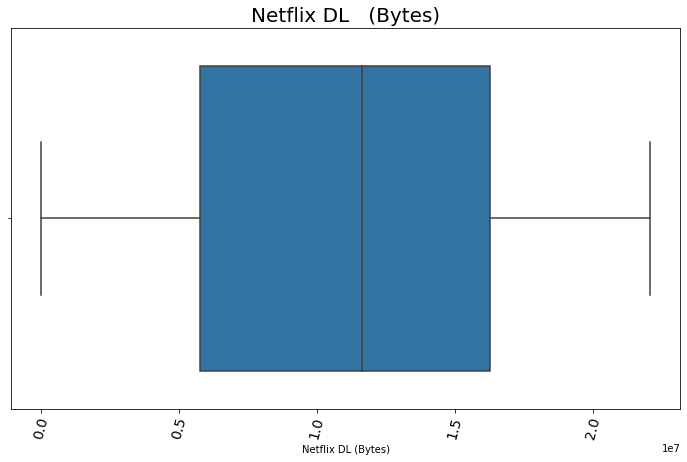

In [64]:
plot_box(df_clean, "Netflix DL (Bytes)", "Netflix DL   (Bytes)")

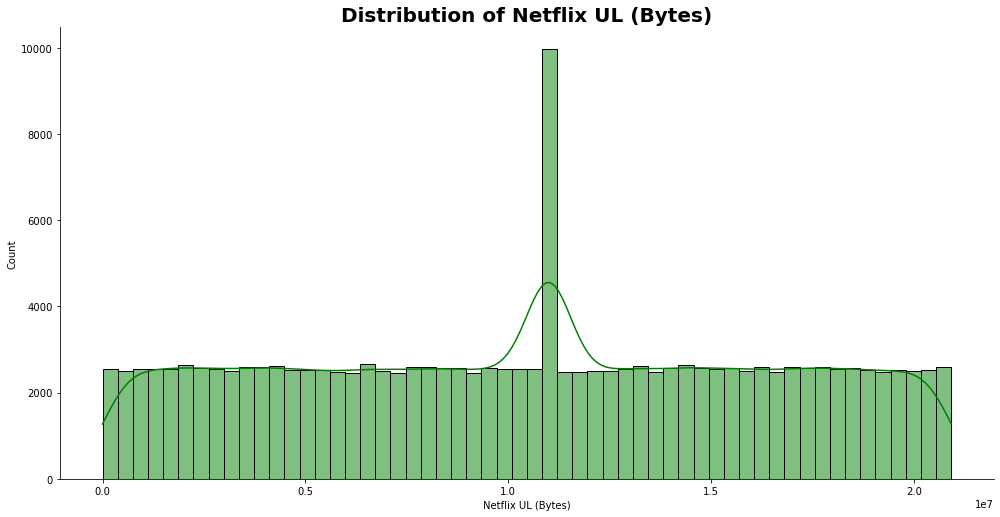

In [65]:
plot_hist(df_clean, "Netflix UL (Bytes)", "green")

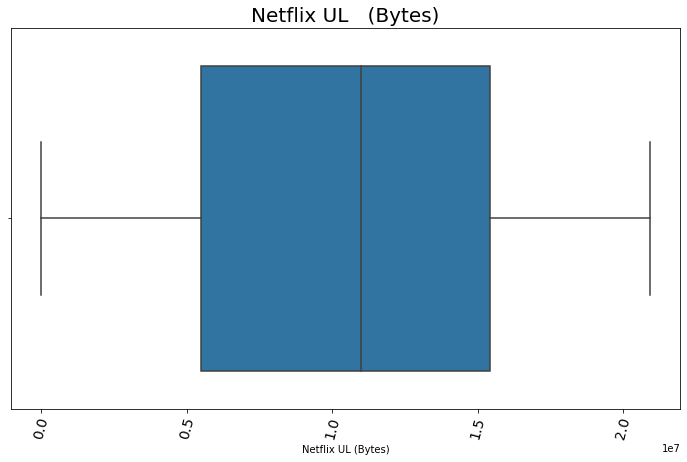

In [66]:
plot_box(df_clean, "Netflix UL (Bytes)", "Netflix UL   (Bytes)")

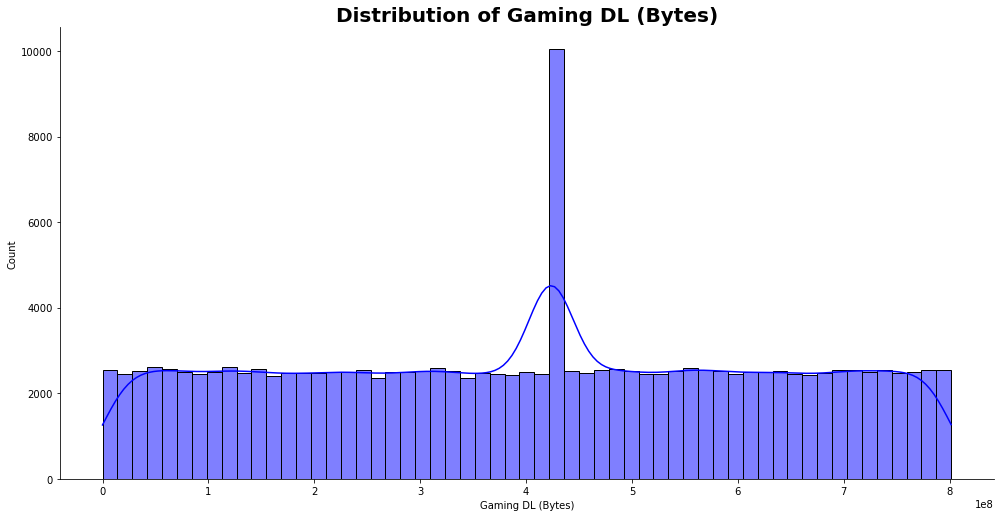

In [67]:
plot_hist(df_clean, "Gaming DL (Bytes)", "blue")

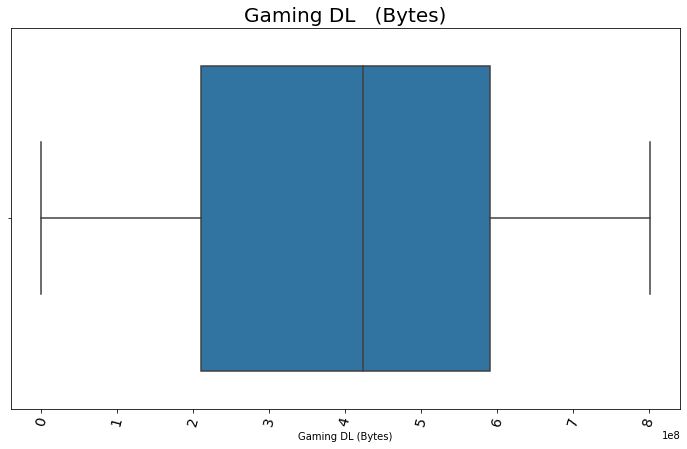

In [68]:
plot_box(df_clean, "Gaming DL (Bytes)", "Gaming DL   (Bytes)")

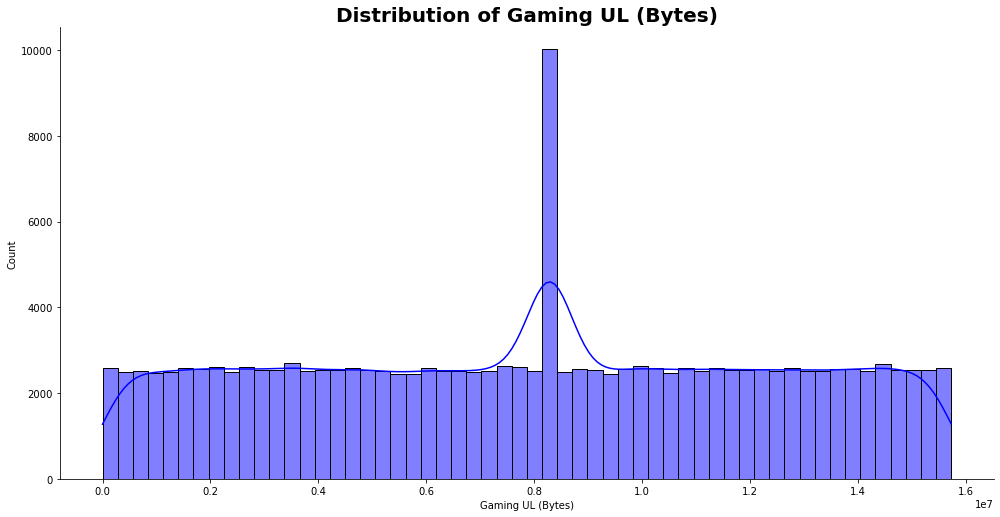

In [69]:
plot_hist(df_clean, "Gaming UL (Bytes)", "blue")

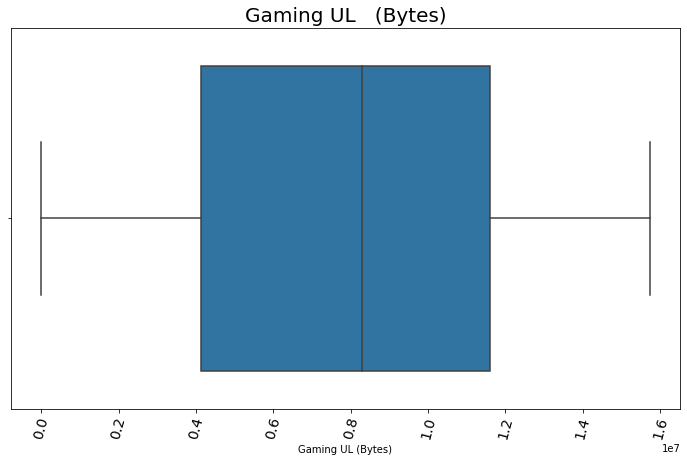

In [70]:
plot_box(df_clean, "Gaming UL (Bytes)", "Gaming UL   (Bytes)")

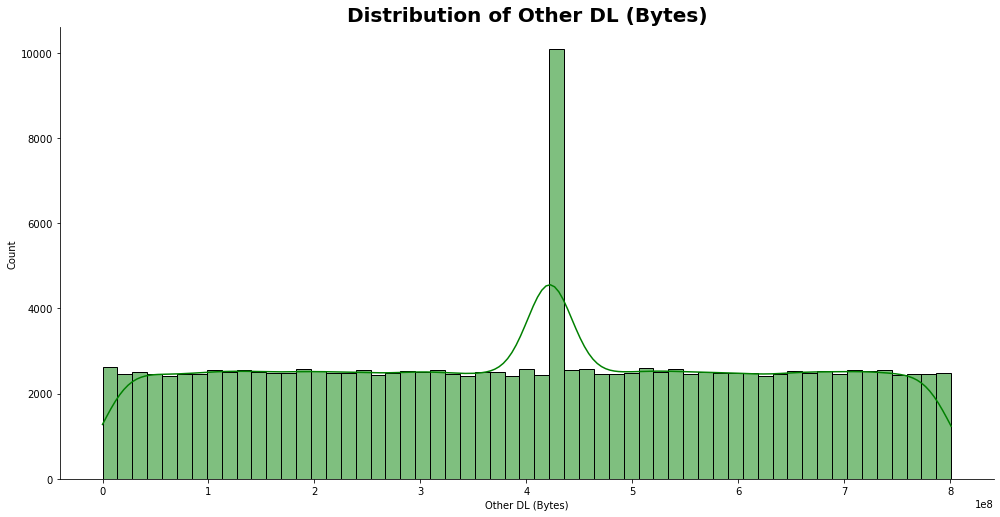

In [71]:
plot_hist(df_clean, "Other DL (Bytes)", "green")

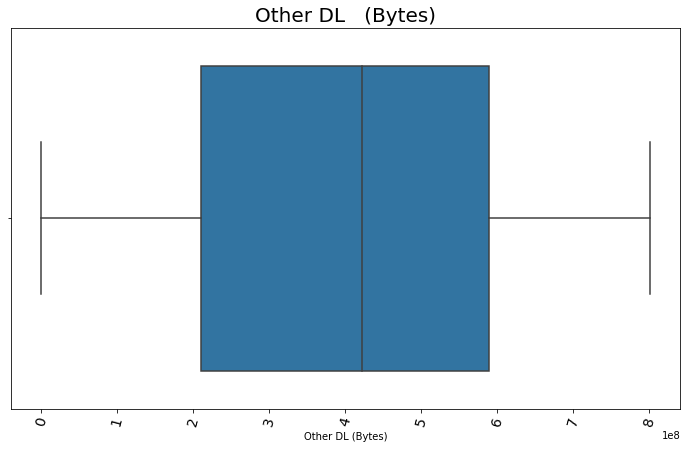

In [72]:
plot_box(df_clean, "Other DL (Bytes)", "Other DL   (Bytes)")

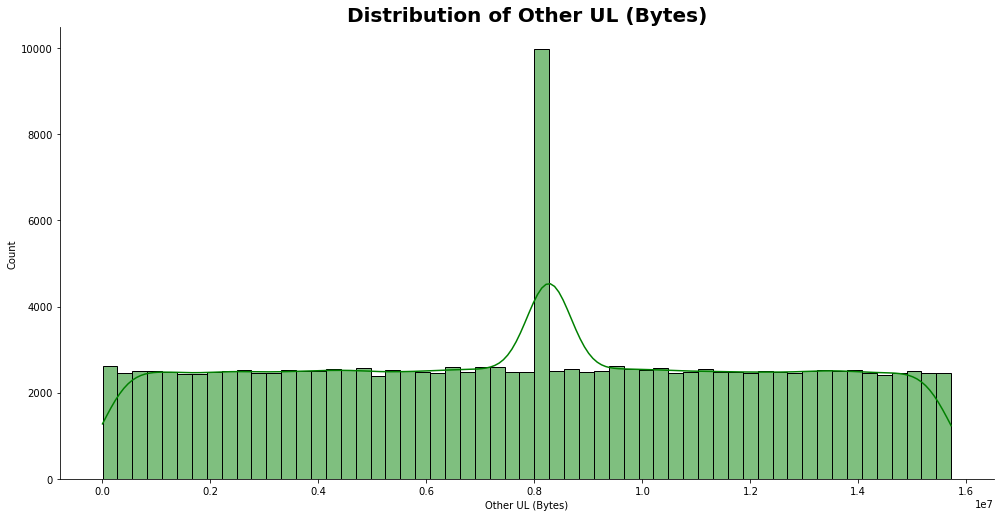

In [73]:
plot_hist(df_clean, "Other UL (Bytes)", "green")

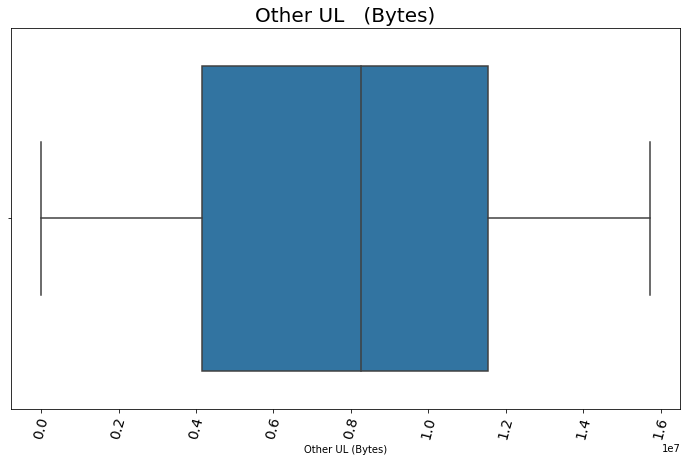

In [74]:
plot_box(df_clean, "Other UL (Bytes)", "Other UL   (Bytes)")

#### Cross tabulations and bivariate plots

* Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

In [75]:
# adding Decile_rank column to the DataFrame
df_clean['Decile_rank'] = pd.qcut(df_clean['Dur. (ms)'], 5, labels = False)
df_clean['Total_Data'] = df_clean["Total UL (Bytes)"] + df_clean["Total DL (Bytes)"]

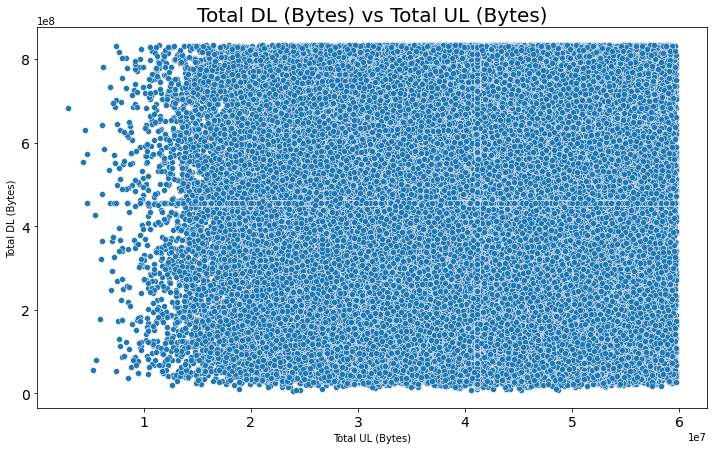

In [76]:
# Scatter plt

plt.figure(figsize=(12, 7))
sns.scatterplot(data = df_clean, x="Total UL (Bytes)", y="Total DL (Bytes)")
plt.title( "Total DL (Bytes) vs Total UL (Bytes)", size=20)
plt.xticks(fontsize=14)
plt.yticks( fontsize=14)
plt.show()

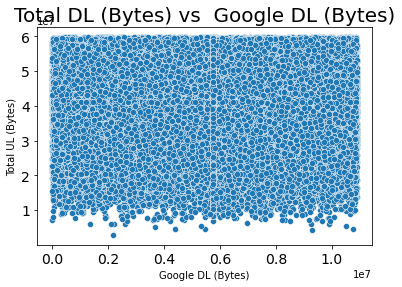

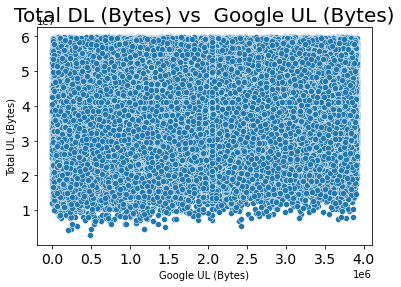

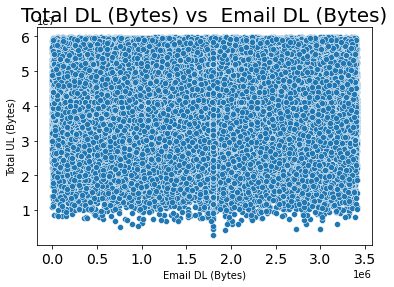

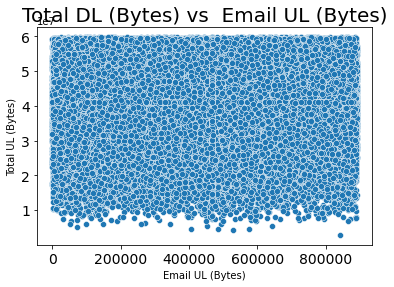

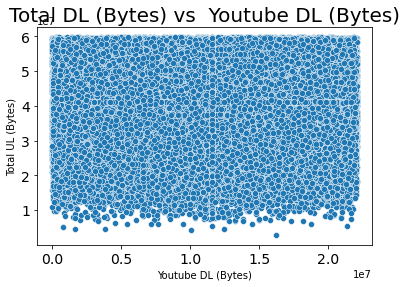

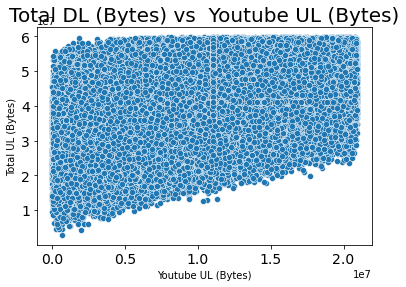

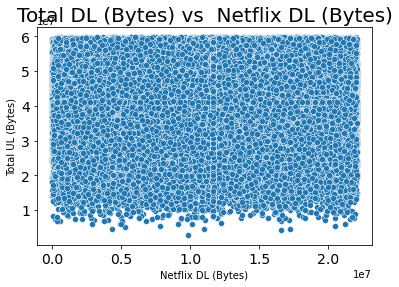

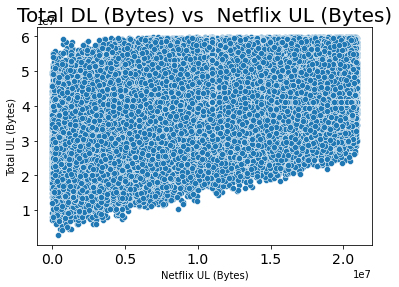

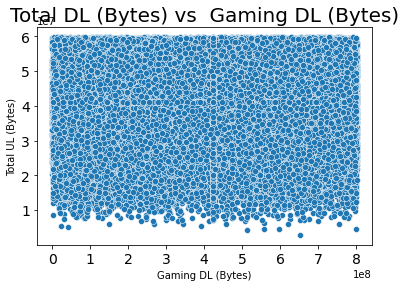

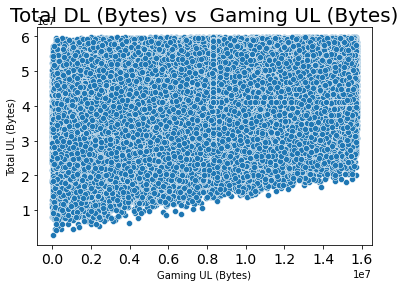

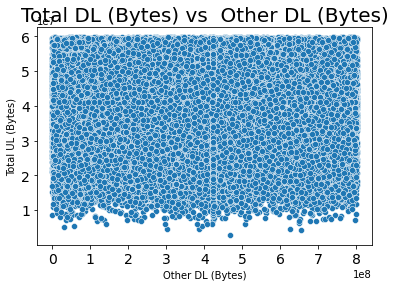

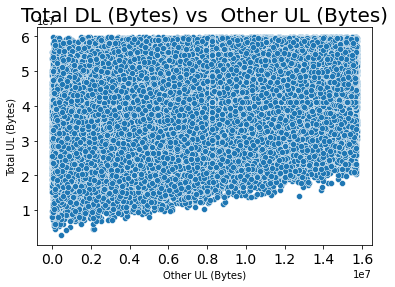

In [77]:
for var in ["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]:
#     plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df_clean, x=var, y="Total UL (Bytes)")
    plt.title( "Total DL (Bytes) vs  " + str(var), size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

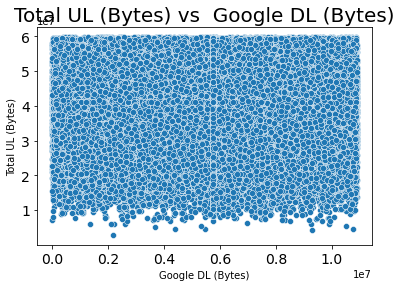

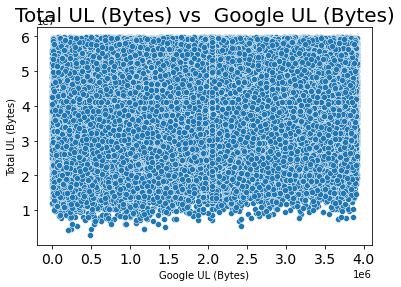

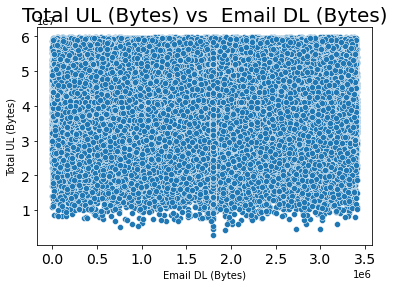

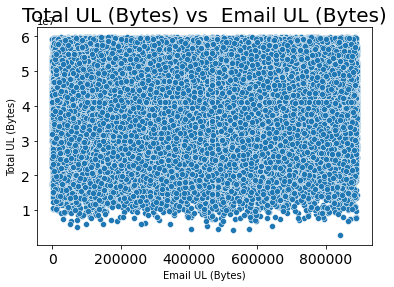

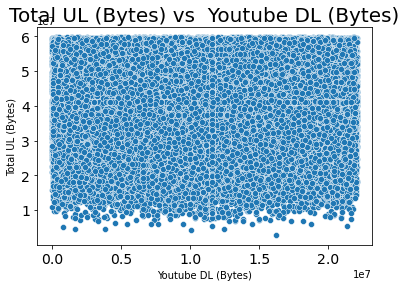

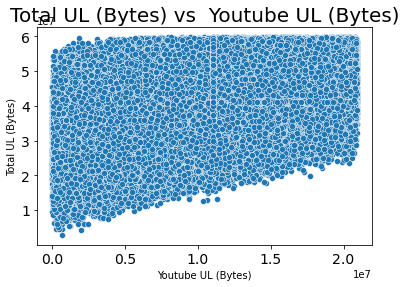

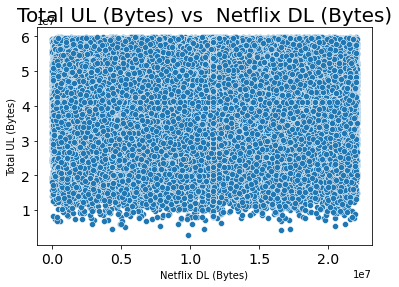

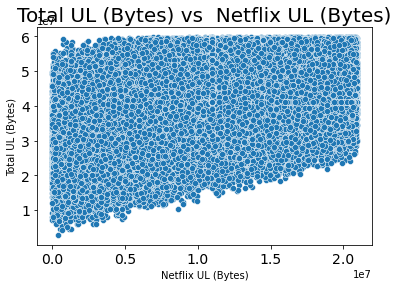

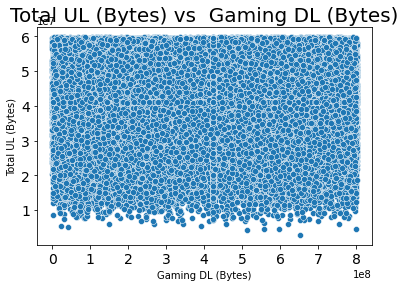

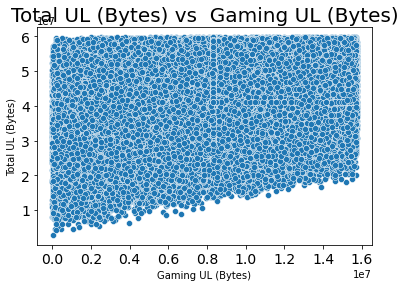

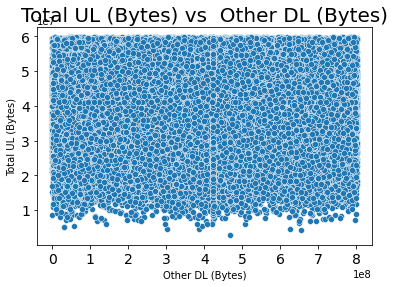

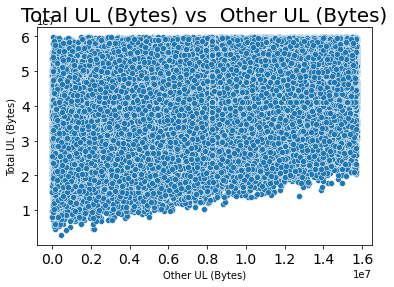

In [78]:
for var in ["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]:
    #plt.figure(figsize=(12, 7))

    sns.scatterplot(data = df_clean, x=var, y="Total UL (Bytes)")
    plt.title( "Total UL (Bytes) vs  " + str(var), size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

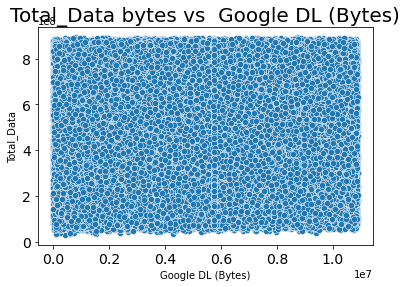

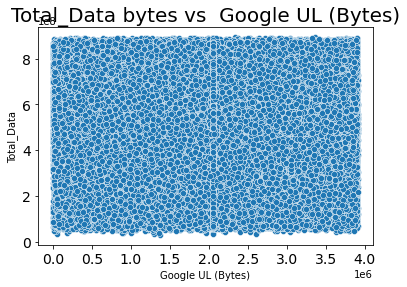

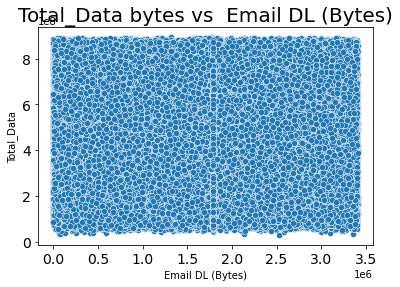

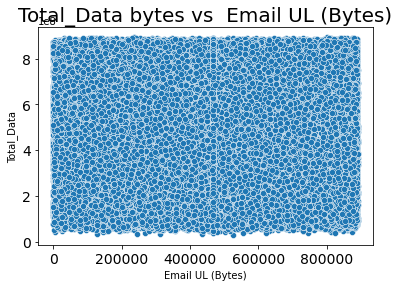

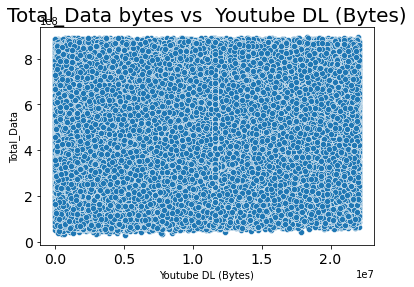

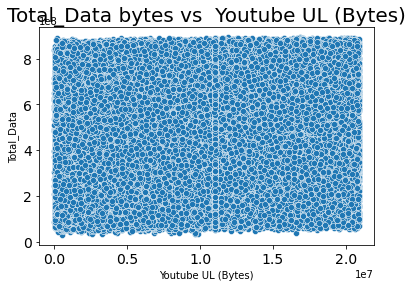

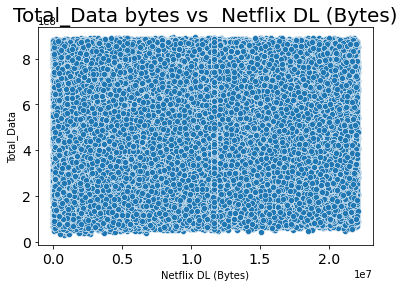

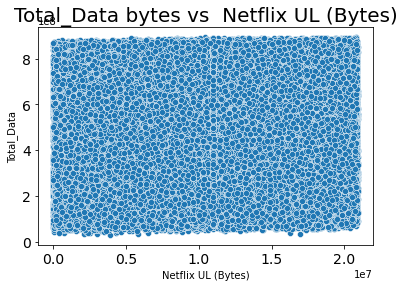

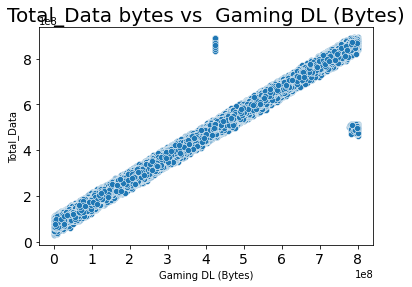

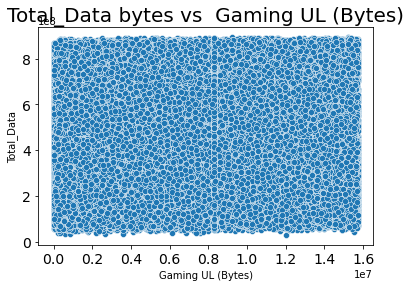

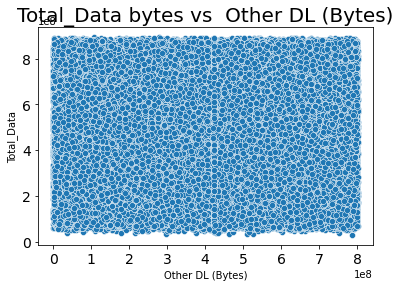

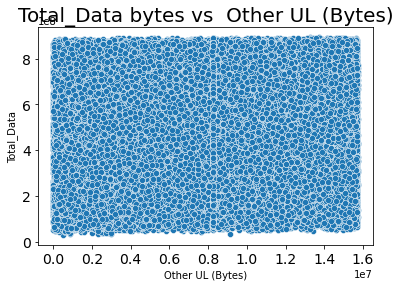

In [79]:
for var in ["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]:
#     plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df_clean, x=var, y="Total_Data")
    plt.title( "Total_Data bytes vs  " + str(var), size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

* Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [80]:
df_clean.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18    770.00 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04    235.00 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11      1.00 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25    486.00 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23    565.00 2019-04-25 10:40:32   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0 35,521,209,507,511.00   9164566995485190            42.00             5.00   
1 35,794,009,006,359.00            L77566A            65.00             5.00   
2 35,281,510,359,387.00            D42335A           109.80            17.66   
3 35,356,610,164,913.00            T21824A           109.80            17.66   
4 35,407,009,745,539.00            D88865A           109.80            17.66   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                    23.00                    44.00   
1                    16.00                    26.00   
2                     6.00                     9.00   
3                    44.00                    44.00   
4                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                20,809,914.27                   759,658.66   
1                20,809,914.27                   759,658.66   
2                20,809,914.27                   759,658.66   
3                20,809,914.27                   759,658.66   
4                20,809,914.27                   759,658.66   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00   114,471,023.70     3,242,301.38   
1                  0.00   114,471,023.70     3,242,301.38   
2                  0.00   114,471,023.70     3,242,301.38   
3                  0.00   114,471,023.70     3,242,301.38   
4                  0.00   114,471,023.70     3,242,301.38   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00                  37,882.00 1,321,509

In [81]:
# Total DL (Bytes) per Decile: sum

df_clean.groupby("Decile_rank")['Total DL (Bytes)'].sum()

Decile_rank
0   13,018,349,829,424.00
1   20,719,671,308,121.00
2    5,339,196,272,945.00
3   13,034,191,838,552.08
4   13,080,990,378,146.00
Name: Total DL (Bytes), dtype: float64

In [82]:
# Total DL (Bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total DL (Bytes)'].mean()

Decile_rank
0   433,930,529.96
1   434,347,343.10
2   434,151,591.56
3   434,487,544.20
4   436,033,012.60
Name: Total DL (Bytes), dtype: float64

In [83]:
# Total UL (Bytes) per Decile: Sum

df_clean.groupby("Decile_rank")['Total UL (Bytes)'].sum()

Decile_rank
0   1,200,628,755,003.00
1   1,908,258,181,666.00
2     493,490,399,245.00
3   1,198,427,308,043.29
4   1,197,867,489,239.00
Name: Total UL (Bytes), dtype: float64

In [84]:
# Total UL (Bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total UL (Bytes)'].mean()

Decile_rank
0   40,019,624.51
1   40,002,896.71
2   40,127,695.50
3   39,948,908.57
4   39,928,916.31
Name: Total UL (Bytes), dtype: float64

In [85]:
# Total Data (bytes) per Decile : Sum
df_clean.groupby("Decile_rank")['Total_Data'].sum()

Decile_rank
0   14,218,978,584,427.00
1   22,627,929,489,787.00
2    5,832,686,672,190.00
3   14,232,619,146,595.37
4   14,278,857,867,385.00
Name: Total_Data, dtype: float64

In [86]:
# Total Data (bytes) per Decile: Average

df_clean.groupby("Decile_rank")['Total_Data'].mean()

Decile_rank
0   473,950,154.48
1   474,350,239.81
2   474,279,287.05
3   474,436,452.77
4   475,961,928.91
Name: Total_Data, dtype: float64

* Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 

In [87]:
df_clean_corr = df_clean[["Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)", "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"]]
df_clean_corr

Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
0            1,634,479.00       1,271,433.00      1,793,505.00   
1            3,493,924.00         920,172.00        629,046.00   
2            8,535,055.00       1,694,064.00      2,690,151.00   
3            9,023,734.00       2,788,027.00      1,439,754.00   
4            6,248,284.00       1,500,559.00      1,936,496.00   
...                   ...                ...               ...   
149996       9,967,603.00       2,817,311.00         57,639.00   
149997       2,229,420.00       2,185,941.00      1,954,414.00   
149998       3,850,890.00       2,734,579.00      1,525,734.00   
149999       4,189,773.00       3,567,494.00      2,228,270.00   
150000       5,750,752.62       2,056,541.93      1,791,728.87   

        Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0             137,762.00       15,854,611.00        2,501,332.00   
1             308,339.00       20,247,395.00       19,111,729.00   
2             672,973.00       19,725,661.00       14,699,576.00   
3             631,229.00       21,388,122.00       15,146,643.00   
4             173,853.00       15,259,380.00       18,962,873.00   
...                  ...                 ...                 ...   
149996        633,237.00       16,191,667.00       11,763,428.00   
149997        167,304.00       13,877,234.00        8,288,284.00   
149998        532,543.00       11,616,019.00        1,855,903.00   
149999        622,644.00        8,817,106.00        8,305,402.00   
150000        467,373.44       11,634,072.50       11,009,410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0             8,198,936.00        9,656,251.00     278,082,303.00   
1            18,338,413.00       17,227,132.00     608,750,074.00   
2            17,587,794.00        6,163,408.00     229,584,621.00   
3            13,994,646.00        1,097,942.00     799,538,153.00   
4            17,124,581.00          415,218.00     527,707,248.00   
...                    ...                 ...                ...   
149996       17,883,703.00       19,678,161.00     526,609,673.00   
149997       19,350,146.00       10,996,384.00     626,893,062.00   
149998        9,963,942.00        5,065,760.00     553,539,484.00   
149999        3,322,253.00       13,172,589.00     352,536,971.00   
150000       11,626,851.72       11,001,754.82     422,044,702.60   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
0           14,344,150.00    171,744,450.00      8,814,393.00  
1            1,170,709.00    526,904,238.00     15,055,145.00  
2              395,630.00    410,692,588.00      4,215,763.00  
3           10,849,722.00    749,039,933.00     12,797,283.00  
4            3,529,801.00    550,709,500.00     13,910,322.00  
...                   ...               ...               ...  
149996       9,197,207.00      3,264,510.00     13,487,416.00  
149997       4,735,033.00    712,180,387.00      2,457,758.00  
149998      13,394,316.00    121,100,856.00     11,314,729.00  
149999       2,529,475.00    421,803,006.00      1,406,930.00  
150000       8,288,398.11    421,100,544.19      8,264,799.42  

[150001 rows x 12 columns]

In [88]:
corrMatrix = df_clean_corr.corr()
corrMatrix

Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
Google DL (Bytes)                1.00               0.00              0.00   
Google UL (Bytes)                0.00               1.00              0.00   
Email DL (Bytes)                 0.00               0.00              1.00   
Email UL (Bytes)                 0.00              -0.00              0.01   
Youtube DL (Bytes)               0.00              -0.00              0.00   
Youtube UL (Bytes)              -0.00               0.00             -0.00   
Netflix DL (Bytes)               0.00              -0.00              0.00   
Netflix UL (Bytes)              -0.00              -0.00             -0.00   
Gaming DL (Bytes)               -0.00               0.00              0.00   
Gaming UL (Bytes)               -0.00              -0.00             -0.00   
Other DL (Bytes)                -0.00               0.00             -0.00   
Other UL (Bytes)                 0.00              -0.00              0.00   

                    Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
Google DL (Bytes)               0.00                0.00               -0.00   
Google UL (Bytes)              -0.00               -0.00                0.00   
Email DL (Bytes)                0.01                0.00               -0.00   
Email UL (Bytes)                1.00               -0.00               -0.01   
Youtube DL (Bytes)             -0.00                1.00                0.00   
Youtube UL (Bytes)             -0.01                0.00                1.00   
Netflix DL (Bytes)             -0.00                0.00               -0.00   
Netflix UL (Bytes)              0.00                0.00                0.00   
Gaming DL (Bytes)              -0.00               -0.00               -0.00   
Gaming UL (Bytes)               0.00               -0.00               -0.00   
Other DL (Bytes)               -0.00                0.00                0.00   
Other UL (Bytes)                0.00               -0.00               -0.00   

                    Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
Google DL (Bytes)                 0.00               -0.00              -0.00   
Google UL (Bytes)                -0.00               -0.00               0.00   
Email DL (Bytes)                  0.00               -0.00               0.00   
Email UL (Bytes)                 -0.00                0.00              -0.00   
Youtube DL (Bytes)                0.00                0.00              -0.00   
Youtube UL (Bytes)               -0.00                0.00              -0.00   
Netflix DL (Bytes)                1.00                0.00              -0.01   
Netflix UL (Bytes)                0.00                1.00              -0.00   
Gaming DL (Bytes)                -0.01               -0.00               1.00   
Gaming UL (Bytes)                 0.00               -0.00              -0.00   
Other DL (Bytes)                 -0.01               -0.01               0.00   
Other UL (Bytes)                 -0.00               -0.00               0.00   

                    Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
Google DL (Bytes)               -0.00             -0.00              0.00  
Google UL (Bytes)               -0.00              0.00             -0.00  
Email DL (Bytes)                -0.00             -0.00              0.00  
Email UL (Bytes)                 0.00             -0.00              0.00  
Youtube DL (Bytes)              -0.00              0.00             -0.00  
Youtube UL (Bytes)              -0.00              0.00             -0.00  
Netflix DL (Bytes)               0.00             -0.01             -0.00  
Netflix UL (Bytes)              -0.00             -0.01             -0.00  
Gaming DL (Bytes)               -0.00              0.00              0.00  
Gaming UL (Bytes)                1.00             -0.00             -0.01  
Other DL (Bytes)                -0.00              1.00              0.00 

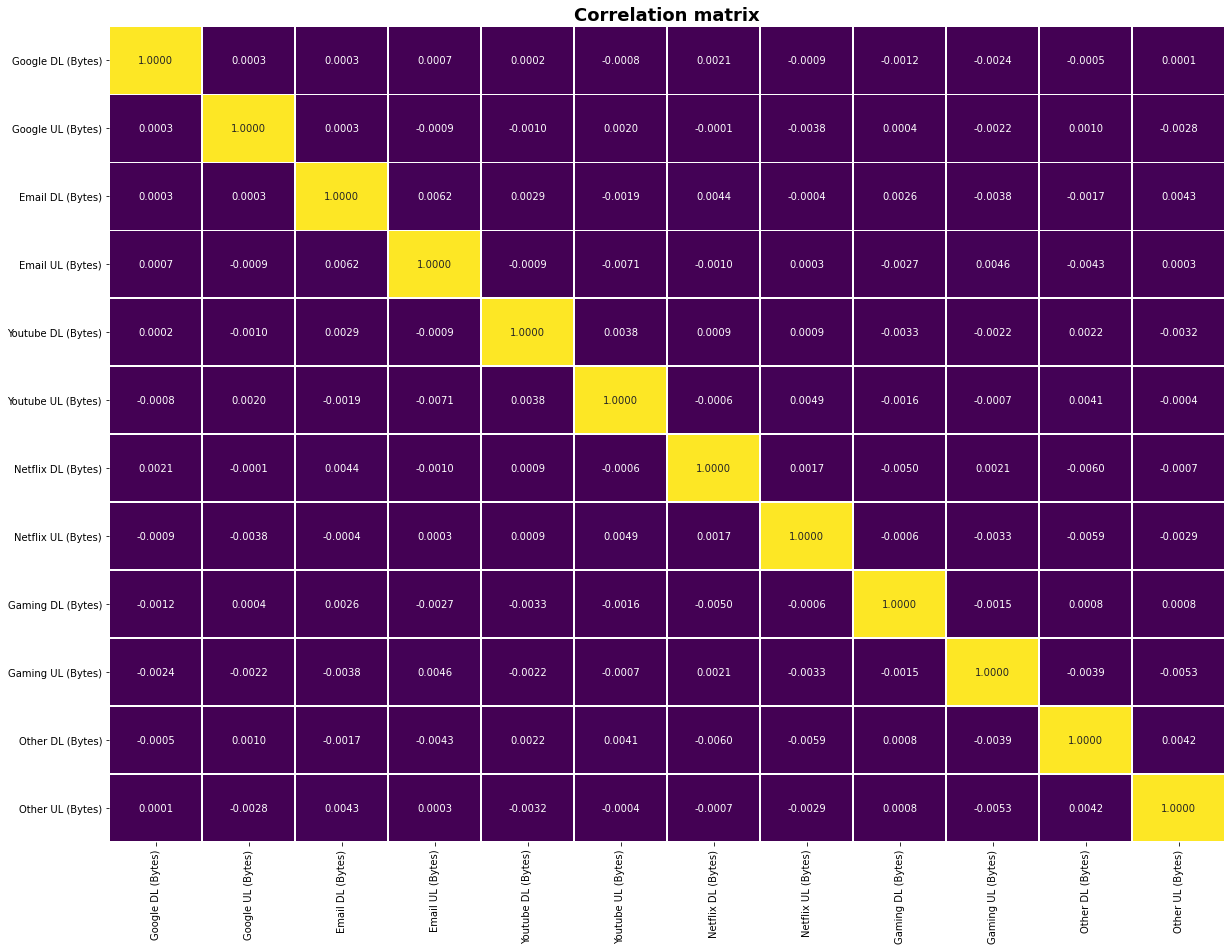

In [89]:
# Correlation heatmap

plot_heatmap(corrMatrix, "Correlation matrix", cbar=False)

Results interpretation: 
According to this hitmap of the correlation, we can see that there is no significant correlation between the data (variables) and most of them are negativelly correlated, where increase in ione corresponds to the decrease of the other.

* Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_clean_corr)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [91]:
principalDf

principal component 1  principal component 2  principal component 3
0              147,631,264.93         214,899,435.51           2,079,064.29
1             -218,829,965.20        -103,196,260.31          -8,869,243.55
2              170,520,117.01         -27,845,430.69          -7,809,903.95
3             -432,097,557.87        -303,851,017.65          -4,625,872.78
4             -140,769,272.24        -135,462,876.55          -6,551,251.05
...                       ...                    ...                    ...
149996         -81,628,033.13         408,783,599.56          -7,688,184.61
149997        -256,517,138.39        -285,501,922.77          -8,718,456.29
149998        -120,903,222.69         294,465,592.27           1,114,345.46
149999          47,079,807.10         -25,855,065.93           7,992,658.41
150000         -21,959,940.28         -17,785,944.87            -654,039.03

[150001 rows x 3 columns]

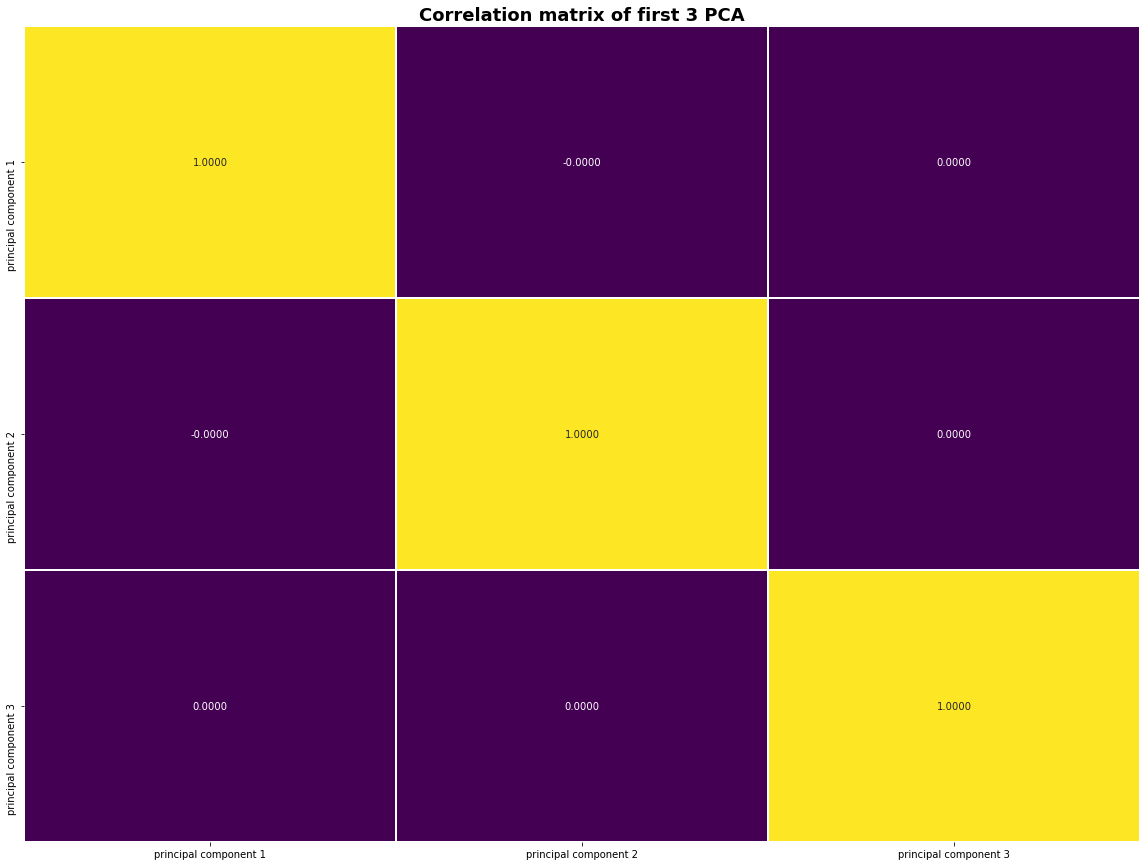

In [92]:
plot_heatmap(principalDf.corr(), "Correlation matrix of first 3 PCA", cbar=False)

## Task 2 - User Engagement analysis


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
* sessions frequency 
* the duration of the session 
* the sessions total traffic (download and upload (bytes))


Task 2.1 - Based on the above submit python script and slide :

* Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 


In [93]:
# Our variables are: 

# sessions frequency: 'Bearer Id'
# the duration of the session: Dur. (ms)
# the sessions total traffic (download and upload (bytes)): Total_Data

In [94]:
# sessions frequency: 'Bearer Id': For this I am aggregating by counting as these are the IDs for each session
df_clean.groupby("MSISDN/Number")['Bearer Id'].count().reset_index().sort_values(['Bearer Id'], ascending=False).head(10)

MSISDN/Number  Bearer Id
106853 41,882,819,545.03       1066
13526  33,626,320,676.00         18
13180  33,625,779,332.00         17
6437   33,614,892,860.00         17
37052  33,659,725,664.00         16
76363  33,675,877,202.00         15
92923  33,760,536,639.00         15
65118  33,667,163,239.00         13
1279   33,604,515,716.00         12
13994  33,627,080,969.00         12

In [95]:
# the duration of the session: Dur. (ms): For this I am summing to get the total duration for each ID
df_clean.groupby("MSISDN/Number")['Dur. (ms)'].sum().reset_index().sort_values(['Dur. (ms)'], ascending=False).head(10)

MSISDN/Number     Dur. (ms)
106853 41,882,819,545.03 72,551,004.56
13180  33,625,779,332.00 18,553,754.00
6437   33,614,892,860.00  9,966,898.00
92923  33,760,536,639.00  9,279,434.00
13526  33,626,320,676.00  8,791,927.00
65118  33,667,163,239.00  8,744,914.00
50281  33,662,840,755.00  6,614,270.00
57160  33,664,693,736.00  6,288,730.00
666    33,603,127,838.00  6,287,761.00
66029  33,667,456,716.00  5,649,882.00

In [96]:
# the sessions total traffic (download and upload (bytes)): Total_Data: For this I am summing to get the total data for each ID
df_clean.groupby("MSISDN/Number")['Total_Data'].sum().reset_index().sort_values(['Total_Data'], ascending=False).head(10)

MSISDN/Number         Total_Data
106853 41,882,819,545.03 508,188,399,282.37
92923  33,760,536,639.00   8,495,067,079.00
6437   33,614,892,860.00   7,993,296,358.00
13180  33,625,779,332.00   7,672,419,390.00
13526  33,626,320,676.00   7,558,797,664.00
76363  33,675,877,202.00   7,511,893,811.00
37052  33,659,725,664.00   6,882,984,413.00
57241  33,664,712,899.00   6,437,285,385.00
63028  33,666,464,084.00   6,140,521,379.00
86455  33,698,792,269.00   6,080,118,012.00

* Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 


In [97]:
# Normalizing the endagement metrics
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_clean[["Dur. (ms)_Norm"]] = minmax_scaler.fit_transform(df_clean[["Dur. (ms)"]])
df_clean[["Total_Data_Norm"]] = minmax_scaler.fit_transform(df_clean[["Total_Data"]])
df_clean.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18    770.00 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04    235.00 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11      1.00 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25    486.00 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23    565.00 2019-04-25 10:40:32   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0 35,521,209,507,511.00   9164566995485190            42.00             5.00   
1 35,794,009,006,359.00            L77566A            65.00             5.00   
2 35,281,510,359,387.00            D42335A           109.80            17.66   
3 35,356,610,164,913.00            T21824A           109.80            17.66   
4 35,407,009,745,539.00            D88865A           109.80            17.66   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                    23.00                    44.00   
1                    16.00                    26.00   
2                     6.00                     9.00   
3                    44.00                    44.00   
4                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                20,809,914.27                   759,658.66   
1                20,809,914.27                   759,658.66   
2                20,809,914.27                   759,658.66   
3                20,809,914.27                   759,658.66   
4                20,809,914.27                   759,658.66   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00   114,471,023.70     3,242,301.38   
1                  0.00   114,471,023.70     3,242,301.38   
2                  0.00   114,471,023.70     3,242,301.38   
3                  0.00   114,471,023.70     3,242,301.38   
4                  0.00   114,471,023.70     3,242,301.38   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00                  37,882.00 1,321,509

In [98]:
df_clean["Bearer Id_Count"] = 1
df_clean

Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18    770.00   
1       13114483482878900224 2019-04-09 13:04:04    235.00   
2       13114483484080500736 2019-04-09 17:42:11      1.00   
3       13114483485442799616 2019-04-10 00:31:25    486.00   
4       13114483499480700928 2019-04-12 20:10:23    565.00   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42    451.00   
149997   7349883264234609664 2019-04-29 07:28:42    483.00   
149998  13114483573367300096 2019-04-29 07:28:43    283.00   
149999  13114483573367300096 2019-04-29 07:28:43    696.00   
150000                                       NaT    499.19   

                       End  End ms    Dur. (ms)                   IMSI  \
0      2019-04-25 14:35:31  662.00 1,823,652.00 208,201,448,079,117.00   
1      2019-04-25 08:15:48  606.00 1,365,104.00 208,201,909,211,140.00   
2      2019-04-25 11:58:13  652.00 1,361,762.00 208,200,314,458,056.00   
3      2019-04-25 07:36:35  171.00 1,321,509.00 208,201,402,342,131.00   
4      2019-04-25 10:40:32  954.00 1,089,009.00 208,201,401,415,120.00   
...                    ...     ...          ...                    ...   
149996 2019-04-30 06:02:33  214.00    81,230.00 208,202,201,200,072.00   
149997 2019-04-30 10:41:33  187.00    97,970.00 208,201,908,153,249.00   
149998 2019-04-30 10:46:12  810.00    98,249.00 208,201,711,161,187.00   
149999 2019-04-30 10:40:34  327.00    97,910.00 208,202,101,098,075.00   
150000                 NaT  498.80   104,608.56 208,201,639,651,672.22   

           MSISDN/Number                  IMEI Last Location Name  \
0      33,664,962,239.00 35,521,209,507,511.00   9164566995485190   
1      33,681,854,413.00 35,794,009,006,359.00            L77566A   
2      33,760,627,129.00 35,281,510,359,387.00            D42335A   
3      33,750,343,200.00 35,356,610,164,913.00            T21824A   
4      33,699,795,932.00 35,407,009,745,539.00            D88865A   
...                  ...                   ...                ...   
149996 33,650,688,697.00 35,483,109,451,938.00            D20434A   
149997 33,663,449,963.00 35,660,508,296,467.00            D10223C   
149998 33,621,890,103.00 35,721,209,870,907.00            T51102A   
149999 33,619,622,058.00 86,186,204,011,457.00            L88342B   
150000 41,882,819,545.03 48,474,547,977,654.16                NaN   

        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0                 42.00             5.00                    23.00   
1                 65.00             5.00                    16.00   
2                109.80            17.66                     6.00   
3                109.80            17.66                    44.00   
4                109.80            17.66                     6.00   
...                 ...              ...                      ...   
149996            32.00             0.00                    52.00   
149997            27.00             2.00                    23.00   
149998            43.00             6.00                    43.00   
149999            37.00             5.00                    34.00   
150000           109.80            17.66                13,300.05   

        Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                         44.00                20,809,914.27   
1                         26.00                20,809,914.27   
2                          9.00                20,809,914.27   
3                         44.00                20,809,914.27   
4                          9.00                20,809,914.27   
...                         ...                          ...   
149996                    65.00                20,809,914.27   
149997                    54.00                20,809,914.27   
149998                    47.00                20,809,914.27   
149999                    37.00                20,809,914.27   
150000                 

In [232]:
#data_engagement = df_clean[["Bearer Id_Count", "Dur. (ms)_Norm", "Total_Data_Norm"]]
data_engagement = df_clean[["Dur. (ms)_Norm", "Total_Data_Norm"]]

data_engagement

Dur. (ms)_Norm  Total_Data_Norm
0                 0.98             0.37
1                 0.73             0.78
2                 0.73             0.32
3                 0.71             0.54
4                 0.58             0.67
...                ...              ...
149996            0.04             0.70
149997            0.05             0.78
149998            0.05             0.69
149999            0.05             0.43
150000            0.05             0.54

[150001 rows x 2 columns]

In [233]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data_engagement)

identified_clusters = kmeans.fit_predict(data_engagement)
identified_clusters

array([0, 2, 1, ..., 2, 0, 0])

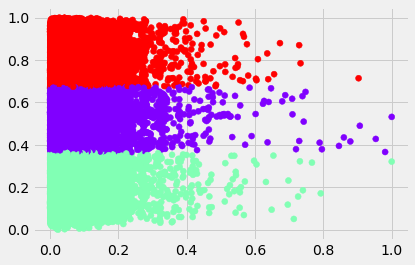

In [234]:
data_engagement['Clusters'] = identified_clusters 
plt.scatter(data_engagement['Dur. (ms)_Norm'],data_engagement['Total_Data_Norm'],c=data_engagement['Clusters'],cmap='rainbow')

In [236]:
cluster_centers_engagement = kmeans.cluster_centers_
cluster_centers_engagement

array([[0.05276127, 0.52219998],
       [0.05256234, 0.20675547],
       [0.05252199, 0.82580008]])

* Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [212]:
df_clean['Clusters_engagement'] = identified_clusters 


In [213]:
# # For Dur. (ms)
# cluster_desc = df_clean.groupby("Clusters")['Bearer Id_Count'].describe()
# cluster_desc['Total'] = df_clean.groupby("Clusters")['Bearer Id_Count'].sum()
# cluster_desc

In [214]:
# For Dur. (ms)
cluster_desc = df_clean.groupby("Clusters_engagement")['Dur. (ms)'].describe()
cluster_desc['Total'] = df_clean.groupby("Clusters_engagement")['Dur. (ms)'].sum()
cluster_desc

count       mean       std      min       25%  \
Clusters_engagement                                                     
0                   55,007.00 104,787.89 82,808.25 7,142.00 57,052.50   
1                   46,455.00 104,481.04 79,530.91 7,146.00 57,745.00   
2                   48,539.00 104,527.38 80,435.97 7,189.00 57,518.00   

                          50%        75%          max            Total  
Clusters_engagement                                                     
0                   86,399.00 132,473.00 1,859,327.00 5,764,067,410.56  
1                   86,399.00 132,710.50 1,679,813.00 4,853,666,675.00  
2                   86,399.00 132,133.00 1,859,336.00 5,073,654,575.00

In [215]:
# For total data

cluster_desc = df_clean.groupby("Clusters_engagement")['Total_Data'].describe()
cluster_desc['Total'] = df_clean.groupby("Clusters_engagement")['Total_Data'].sum()
cluster_desc

count           mean           std            min  \
Clusters_engagement                                                         
0                   55,007.00 482,036,514.54 72,210,421.29 345,629,377.00   
1                   46,455.00 744,134,481.40 75,835,582.96 613,523,204.00   
2                   48,539.00 208,222,704.88 79,435,507.71  28,956,107.00   

                               25%            50%            75%  \
Clusters_engagement                                                
0                   423,201,578.00 490,010,205.00 536,315,422.00   
1                   678,278,488.00 744,240,880.00 809,318,054.00   
2                   139,964,531.00 208,304,956.00 276,685,014.50   

                               max                 Total  
Clusters_engagement                                       
0                   613,521,617.00 26,515,382,555,092.37  
1                   893,192,469.00 34,568,767,333,227.00  
2                   345,795,409.00 10,106,921,872,065.00

* Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [216]:
# Application Totals
df_clean["Total_Smedia"] =  df_clean["Social Media DL (Bytes)"] + df_clean["Social Media UL (Bytes)"]
df_clean["Total_Google"] =  df_clean["Google DL (Bytes)"] + df_clean["Google UL (Bytes)"]
df_clean["Total_Email"] =  df_clean["Email DL (Bytes)"] + df_clean["Email UL (Bytes)"]
df_clean["Total_Youtube"] =  df_clean["Youtube DL (Bytes)"] + df_clean["Youtube UL (Bytes)"]
df_clean["Total_Netflix"] =  df_clean["Netflix DL (Bytes)"] + df_clean["Netflix UL (Bytes)"]
df_clean["Total_Gaming"] =  df_clean["Gaming DL (Bytes)"] + df_clean["Gaming UL (Bytes)"]
df_clean["Total_Other"] =  df_clean["Other DL (Bytes)"] + df_clean["Other UL (Bytes)"]


In [217]:
df_clean.groupby("MSISDN/Number")['Total_Smedia'].sum().reset_index().sort_values(['Total_Smedia'], ascending=False).head(10)

MSISDN/Number     Total_Smedia
106853 41,882,819,545.03 1,973,817,362.21
13526  33,626,320,676.00    43,374,779.00
92923  33,760,536,639.00    39,783,189.00
37052  33,659,725,664.00    35,412,358.00
6437   33,614,892,860.00    28,294,544.00
13180  33,625,779,332.00    27,135,500.00
65118  33,667,163,239.00    24,247,850.00
106137 33,786,323,068.00    23,974,919.00
70960  33,669,068,942.00    23,800,834.00
666    33,603,127,838.00    23,077,825.00

In [218]:
df_clean.groupby("MSISDN/Number")['Total_Google'].sum().reset_index().sort_values(['Total_Google'], ascending=False).head(10)

MSISDN/Number     Total_Google
106853 41,882,819,545.03 7,892,528,588.55
13526  33,626,320,676.00   144,449,805.00
13180  33,625,779,332.00   138,286,331.00
6437   33,614,892,860.00   126,116,731.00
92923  33,760,536,639.00   117,377,248.00
37052  33,659,725,664.00   116,516,345.00
76363  33,675,877,202.00   109,860,502.00
106137 33,786,323,068.00   102,543,248.00
65118  33,667,163,239.00    95,627,711.00
58641  33,665,083,783.00    87,634,510.00

In [219]:
df_clean.groupby("MSISDN/Number")['Total_Email'].sum().reset_index().sort_values(['Total_Email'], ascending=False).head(10)

MSISDN/Number      Total_Email
106853 41,882,819,545.03 2,283,607,695.31
13180  33,625,779,332.00    40,205,168.00
6437   33,614,892,860.00    39,022,410.00
13526  33,626,320,676.00    38,590,704.00
37052  33,659,725,664.00    34,256,815.00
92923  33,760,536,639.00    32,000,485.00
106137 33,786,323,068.00    30,811,580.00
76363  33,675,877,202.00    30,608,433.00
65118  33,667,163,239.00    29,879,962.00
86455  33,698,792,269.00    29,059,042.00

In [220]:
df_clean.groupby("MSISDN/Number")['Total_Youtube'].sum().reset_index().sort_values(['Total_Youtube'], ascending=False).head(10)

MSISDN/Number     Total_Youtube
106853 41,882,819,545.03 23,189,370,657.64
13180  33,625,779,332.00    410,157,561.00
13526  33,626,320,676.00    374,483,047.00
6437   33,614,892,860.00    372,340,932.00
92923  33,760,536,639.00    363,148,599.00
76363  33,675,877,202.00    306,643,953.00
65118  33,667,163,239.00    304,694,805.00
92577  33,760,413,819.00    292,194,604.00
13994  33,627,080,969.00    287,229,017.00
666    33,603,127,838.00    272,916,461.00

In [221]:
df_clean.groupby("MSISDN/Number")['Total_Netflix'].sum().reset_index().sort_values(['Total_Netflix'], ascending=False).head(10)

MSISDN/Number     Total_Netflix
106853 41,882,819,545.03 23,129,557,145.54
37052  33,659,725,664.00    399,519,079.00
6437   33,614,892,860.00    361,401,046.00
13180  33,625,779,332.00    334,560,210.00
92923  33,760,536,639.00    323,724,085.00
13526  33,626,320,676.00    317,921,227.00
65118  33,667,163,239.00    313,939,488.00
76363  33,675,877,202.00    309,093,159.00
92577  33,760,413,819.00    308,005,247.00
106137 33,786,323,068.00    273,353,166.00

In [222]:
df_clean.groupby("MSISDN/Number")['Total_Other'].sum().reset_index().sort_values(['Total_Other'], ascending=False).head(10)

MSISDN/Number        Total_Other
106853 41,882,819,545.03 428,832,563,165.62
13526  33,626,320,676.00   7,787,264,992.00
6437   33,614,892,860.00   7,234,987,723.00
76363  33,675,877,202.00   6,798,515,150.00
13180  33,625,779,332.00   6,354,583,086.00
37052  33,659,725,664.00   6,300,942,091.00
13936  33,626,948,251.00   5,297,439,656.00
13994  33,627,080,969.00   5,117,790,890.00
666    33,603,127,838.00   5,107,735,716.00
65118  33,667,163,239.00   4,941,518,794.00

* Plot the top 3 most used applications using appropriate charts.  


In [223]:
# Top 3 most used applications
application = []
totals = []
for var in ["Total_Smedia", "Total_Google", "Total_Email", "Total_Youtube", "Total_Netflix", "Total_Gaming", "Total_Other"]:
    total = df_clean[var].sum()
    application.append(var)
    totals.append(total)

In [224]:
Application_totals = pd.DataFrame({"application": application, "totals": totals})
Application_totals = Application_totals.sort_values(by=['totals'], ascending=False)
Application_totals

application                totals
5   Total_Gaming 61,498,909,292,675.70
6    Total_Other 61,344,040,275,604.62
3  Total_Youtube  3,235,305,064,334.64
4  Total_Netflix  3,233,085,688,655.54
1   Total_Google  1,115,825,058,162.55
2    Total_Email    322,742,268,451.31
0   Total_Smedia    274,239,359,454.21

* The 3 main application on which bytes are consumed are: "Total_Gaming", "Total_Other" and "Total_Youtube" which have bytes 61,498,909,292,675.70, 61,344,040,275,604.62 and 3,235,305,064,334.64 respectively.


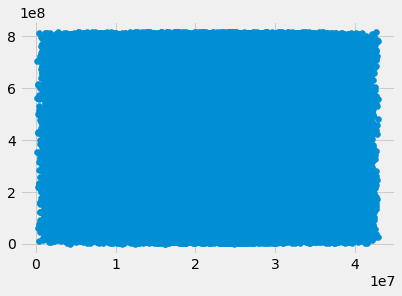

In [225]:
plt.scatter(df_clean["Total_Youtube"], df_clean["Total_Gaming"])

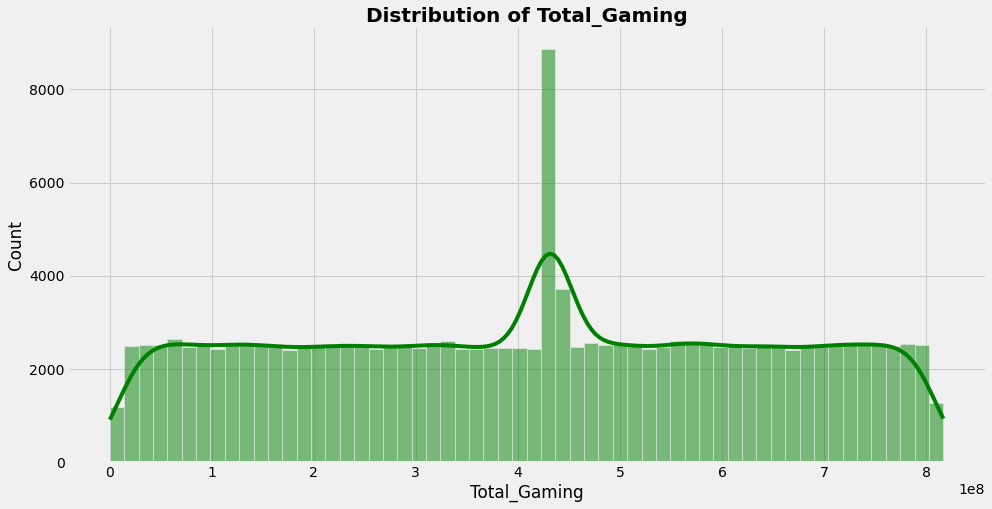

In [226]:
plot_hist(df_clean, "Total_Gaming", "green")

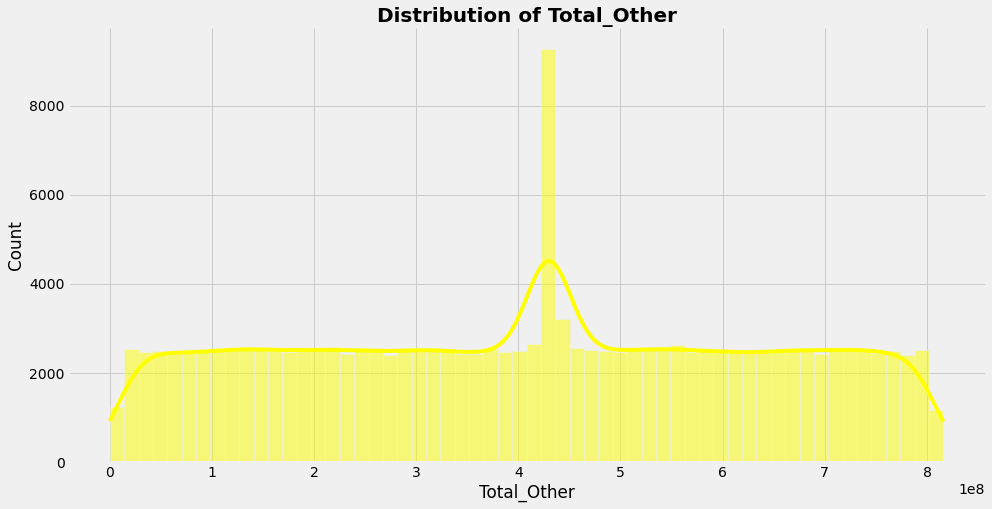

In [227]:
plot_hist(df_clean, "Total_Other", "yellow")

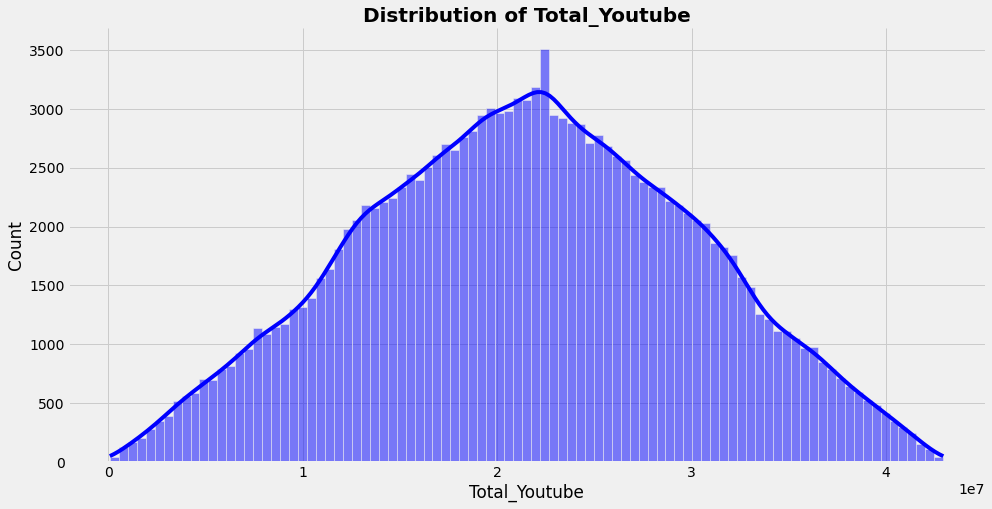

In [228]:
plot_hist(df_clean, "Total_Youtube", "blue")

* Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 


In [229]:
k=3
data = df_clean[["Total_Smedia", "Total_Google", "Total_Email", "Total_Youtube", "Total_Netflix", "Total_Gaming", "Total_Other"]]
kmeans = KMeans(3)
kmeans.fit(data)

identified_clusters = kmeans.fit_predict(data)
identified_clusters

data['Clusters'] = identified_clusters 

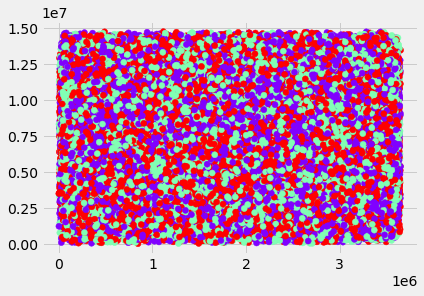

In [230]:
plt.scatter(data['Total_Smedia'],data['Total_Google'],c=data['Clusters'],cmap='rainbow')

No handles with labels found to put in legend.


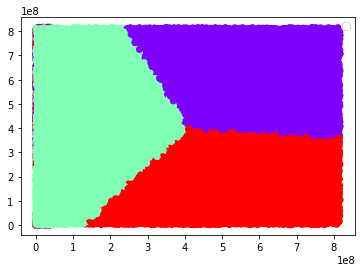

In [121]:
labels = ["Total_Smedia", "Total_Google", "Total_Email", "Total_Youtube", "Total_Netflix", "Total_Gaming", "Total_Other"]

for i in range(len(labels) - 1):
    plt.scatter(data[labels[i]],data[labels[i+1]],c=data['Clusters'],cmap='rainbow')
plt.legend()
plt.show()


In [122]:
k=3
data = df_clean[["Total_Smedia", "Total_Google", "Total_Email", "Total_Youtube", "Total_Netflix", "Total_Gaming", "Total_Other"]]
kmeans = KMeans(3)
kmeans.fit(data)

identified_clusters = kmeans.fit_predict(data)
identified_clusters

data['Clusters'] = identified_clusters    

* What is the optimized value of k (use elbow method for this)?  


In [123]:
# A list holds the SSE values for each k
data = df_clean[["Total_Smedia", "Total_Google", "Total_Email", "Total_Youtube", "Total_Netflix", "Total_Gaming", "Total_Other"]]
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

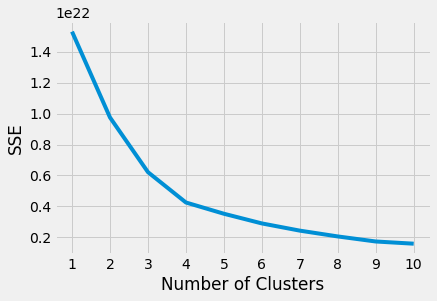

In [124]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* Interpret your findings. 

 According to the elbow method, we see that the optimun k is 4, as it is the one where the SSE change is more significant, othe rk greater than 4 can lead to overfitting as they do not provide much information on reducing the SSE.

## Task 3 - Experience Analytics

#### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):


* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput



In [125]:
df_clean["Avg_TCP"] = df_clean[["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)"]].mean(axis=1)
df_clean["Average_RTT"] = df_clean[["Avg RTT DL (ms)", "Avg RTT UL (ms)"]].mean(axis=1)
df_clean["Average_throughput"] = df_clean[["Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]].mean(axis=1)

##### Top 10

In [126]:
df_clean.groupby("MSISDN/Number")['Avg_TCP'].mean().reset_index().sort_values(['Avg_TCP'], ascending=False).head(10)

MSISDN/Number          Avg_TCP
85785 33,698,575,965.00 2,150,738,719.50
32273 33,658,706,088.00 2,144,060,430.00
58026 33,664,907,178.00 2,134,323,675.00
31942 33,658,633,234.00 2,127,329,821.50
62049 33,666,125,485.00 2,105,628,909.50
70079 33,668,768,421.00 2,083,297,486.50
43629 33,661,305,358.00 2,068,968,868.50
48341 33,662,396,708.00 2,058,902,486.50
64113 33,666,824,231.00 1,984,060,298.00
98211 33,762,643,398.00 1,893,435,466.50

In [127]:
df_clean.groupby("MSISDN/Number")['Average_RTT'].mean().reset_index().sort_values(['Average_RTT'], ascending=False).head(10)

MSISDN/Number  Average_RTT
96771  33,761,972,418.00       133.00
65803  33,667,384,210.00       133.00
94830  33,761,348,045.00       132.50
12259  33,624,326,256.00       132.00
69856  33,668,689,832.00       131.00
30827  33,658,386,859.00       130.50
103212 33,777,693,268.00       130.00
32508  33,658,751,530.00       129.50
23986  33,650,247,779.00       129.00
44404  33,661,489,043.00       129.00

In [128]:
df_clean.groupby("MSISDN/Number")['Average_throughput'].mean().reset_index().sort_values(['Average_throughput'], ascending=False).head(10)

MSISDN/Number  Average_throughput
89296 33,699,666,281.00           36,208.00
94398 33,761,181,866.00           35,897.00
58043 33,664,910,976.00           35,883.00
79451 33,682,067,806.00           35,817.50
21722 33,646,881,147.00           35,768.50
71240 33,669,157,841.00           35,704.50
86837 33,698,905,019.00           35,565.00
24228 33,650,312,741.00           35,499.50
16793 33,632,542,146.00           35,225.00
36115 33,659,514,540.00           35,172.00

##### 10  bottom

In [129]:
df_clean.groupby("MSISDN/Number")['Avg_TCP'].mean().reset_index().sort_values(['Avg_TCP'], ascending=True).head(10)

MSISDN/Number  Avg_TCP
23472  33,650,128,412.00    48.50
6359   33,614,777,138.00    64.00
96977  33,762,062,356.00    64.50
13546  33,626,357,513.00    67.00
2177   33,607,833,304.00    71.50
25863  33,650,681,239.00    88.00
102198 33,769,636,458.00    88.00
105775 33,784,203,839.00    88.50
78100  33,679,366,089.00    89.50
89395  33,699,694,715.00    91.00

In [130]:
df_clean.groupby("MSISDN/Number")['Average_RTT'].mean().reset_index().sort_values(['Average_RTT'], ascending=True).head(10)

MSISDN/Number  Average_RTT
28878 33,652,982,188.00         0.00
44748 33,661,575,382.00         0.00
39066 33,660,204,450.00         1.00
83396 33,695,045,499.00         2.00
36039 33,659,493,541.00         2.50
69662 33,668,619,895.00         3.00
66098 33,667,477,967.00         3.50
21980 33,647,679,481.00         4.00
74434 33,672,196,893.00         4.50
3882  33,610,846,366.00         4.50

In [131]:
df_clean.groupby("MSISDN/Number")['Average_throughput'].mean().reset_index().sort_values(['Average_throughput'], ascending=True).head(10)

MSISDN/Number  Average_throughput
7196   33,616,110,252.00                0.00
14013  33,627,104,017.00                0.00
41946  33,660,874,647.00                0.00
38412  33,660,056,013.00                0.00
62314  33,666,206,832.00                0.00
28037  33,651,845,120.00                0.00
48996  33,662,540,046.00                0.00
17447  33,633,920,682.00                0.00
102039 33,769,366,357.00                0.00
71456  33,669,225,540.00                0.00

##### 10 most frequent

In [132]:
df_clean.groupby("MSISDN/Number")['Avg_TCP'].count().reset_index().sort_values(['Avg_TCP'], ascending=False).head(10)
df_clean.groupby("MSISDN/Number")['Average_RTT'].count().reset_index().sort_values(['Average_RTT'], ascending=False).head(10)
df_clean.groupby("MSISDN/Number")['Average_throughput'].count().reset_index().sort_values(['Average_throughput'], ascending=False).head(10)

MSISDN/Number  Average_throughput
106853 41,882,819,545.03                1066
13526  33,626,320,676.00                  18
13180  33,625,779,332.00                  17
6437   33,614,892,860.00                  17
37052  33,659,725,664.00                  16
76363  33,675,877,202.00                  15
92923  33,760,536,639.00                  15
65118  33,667,163,239.00                  13
1279   33,604,515,716.00                  12
13994  33,627,080,969.00                  12

 All of these have the number of rows or counts, that is for the most frequent, we do not need to run for all averages.
 The top two most frequent customers are those with IDs: "41,882,819,545.03"	 and "33,626,320,676.00", who made these  1066 and 18 frequencies respectively.

####  Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

* TCP values in the dataset. 
* RTT values in the dataset.
* Throughput values in the dataset.

In [133]:
df_clean["Total_TCP"] = df_clean[["TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)"]].sum(axis=1)
df_clean["Total_RTT"] = df_clean[["Avg RTT DL (ms)", "Avg RTT UL (ms)"]].sum(axis=1)
df_clean["Total_throughput"] = df_clean[["Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)"]].sum(axis=1)

##### Top 10

In [134]:
df_clean.groupby("MSISDN/Number")['Total_TCP'].mean().reset_index().sort_values(['Total_TCP'], ascending=False).head(10)

MSISDN/Number        Total_TCP
85785 33,698,575,965.00 4,301,477,439.00
32273 33,658,706,088.00 4,288,120,860.00
58026 33,664,907,178.00 4,268,647,350.00
31942 33,658,633,234.00 4,254,659,643.00
62049 33,666,125,485.00 4,211,257,819.00
70079 33,668,768,421.00 4,166,594,973.00
43629 33,661,305,358.00 4,137,937,737.00
48341 33,662,396,708.00 4,117,804,973.00
64113 33,666,824,231.00 3,968,120,596.00
98211 33,762,643,398.00 3,786,870,933.00

In [135]:
df_clean.groupby("MSISDN/Number")['Total_RTT'].mean().reset_index().sort_values(['Total_RTT'], ascending=False).head(10)

MSISDN/Number  Total_RTT
96771  33,761,972,418.00     266.00
65803  33,667,384,210.00     266.00
94830  33,761,348,045.00     265.00
12259  33,624,326,256.00     264.00
69856  33,668,689,832.00     262.00
30827  33,658,386,859.00     261.00
103212 33,777,693,268.00     260.00
32508  33,658,751,530.00     259.00
23986  33,650,247,779.00     258.00
44404  33,661,489,043.00     258.00

In [136]:
df_clean.groupby("MSISDN/Number")['Total_throughput'].mean().reset_index().sort_values(['Total_throughput'], ascending=False).head(10)

MSISDN/Number  Total_throughput
89296 33,699,666,281.00         72,416.00
94398 33,761,181,866.00         71,794.00
58043 33,664,910,976.00         71,766.00
79451 33,682,067,806.00         71,635.00
21722 33,646,881,147.00         71,537.00
71240 33,669,157,841.00         71,409.00
86837 33,698,905,019.00         71,130.00
24228 33,650,312,741.00         70,999.00
16793 33,632,542,146.00         70,450.00
36115 33,659,514,540.00         70,344.00

##### 10 botom

In [137]:
df_clean.groupby("MSISDN/Number")['Total_TCP'].mean().reset_index().sort_values(['Total_TCP'], ascending=True).head(10)

MSISDN/Number  Total_TCP
23472  33,650,128,412.00      97.00
6359   33,614,777,138.00     128.00
96977  33,762,062,356.00     129.00
13546  33,626,357,513.00     134.00
2177   33,607,833,304.00     143.00
25863  33,650,681,239.00     176.00
102198 33,769,636,458.00     176.00
105775 33,784,203,839.00     177.00
78100  33,679,366,089.00     179.00
89395  33,699,694,715.00     182.00

In [138]:
df_clean.groupby("MSISDN/Number")['Total_RTT'].mean().reset_index().sort_values(['Total_RTT'], ascending=True).head(10)

MSISDN/Number  Total_RTT
28878 33,652,982,188.00       0.00
44748 33,661,575,382.00       0.00
39066 33,660,204,450.00       2.00
83396 33,695,045,499.00       4.00
36039 33,659,493,541.00       5.00
69662 33,668,619,895.00       6.00
66098 33,667,477,967.00       7.00
21980 33,647,679,481.00       8.00
74434 33,672,196,893.00       9.00
3882  33,610,846,366.00       9.00

In [139]:
df_clean.groupby("MSISDN/Number")['Total_throughput'].mean().reset_index().sort_values(['Total_throughput'], ascending=True).head(10)

MSISDN/Number  Total_throughput
7196   33,616,110,252.00              0.00
14013  33,627,104,017.00              0.00
41946  33,660,874,647.00              0.00
38412  33,660,056,013.00              0.00
62314  33,666,206,832.00              0.00
28037  33,651,845,120.00              0.00
48996  33,662,540,046.00              0.00
17447  33,633,920,682.00              0.00
102039 33,769,366,357.00              0.00
71456  33,669,225,540.00              0.00

#####  Most frequent: Just one of them is sufficients as no missings as the missings have been replaced by mean.

In [140]:
df_clean.groupby("MSISDN/Number")['Total_TCP'].count().reset_index().sort_values(['Total_TCP'], ascending=False).head(10)

MSISDN/Number  Total_TCP
106853 41,882,819,545.03       1066
13526  33,626,320,676.00         18
13180  33,625,779,332.00         17
6437   33,614,892,860.00         17
37052  33,659,725,664.00         16
76363  33,675,877,202.00         15
92923  33,760,536,639.00         15
65118  33,667,163,239.00         13
1279   33,604,515,716.00         12
13994  33,627,080,969.00         12

#### Task 3.3 - Compute & report:


##### The distribution of the average throughput  per handset type and provide interpretation for your findings.

In [141]:
df_clean.groupby("Handset Type")['Average_throughput'].mean().reset_index().sort_values(['Average_throughput'], ascending=False)

Handset Type  Average_throughput
966                    Samsung Galaxy S9+           33,691.50
124   Asustek Asus Ze550Kl Zenfone2 Laser           31,494.50
349                          Huawei E8372           29,095.00
423                        Huawei P9 Plus           28,459.00
3            A-Link Telecom I. Cubot Nova           28,108.50
...                                   ...                 ...
1006                    Samsung Gt-S6310N                1.00
1225                            Test IMEI                1.00
804      Quectel Wireless. Quectel Ec25-E                0.50
1253                              Wct Uno                0.00
589                            Lg Lg-T385                0.00

[1396 rows x 2 columns]

"Samsung Galaxy S9+" and "Asustek Asus Ze550Kl Zenfone2 Laser" are the handset with the highest average throughput where they have 33,691.50 and 31,494.50 respectively. On the other hand, the "Lg Lg-T385" and "Wct Uno" are least bought handsets with 0 average throughouts for both   

##### The average TCP retransmission view per handset type and provide interpretation for your findings.

In [142]:
df_clean.groupby("Handset Type")['Avg_TCP'].mean().reset_index().sort_values(['Avg_TCP'], ascending=False)

Handset Type        Avg_TCP
586                           Lg Lg-H635 456,274,528.38
324                      Huawei Bln-Al10 164,587,296.00
142  Asustek Asus Zenfone Selfie Zd551Kl 160,829,153.00
974      Samsung Galaxy Tab S3 (Sm-T825) 101,398,139.37
345                     Huawei E5776S-32  84,414,675.99
..                                   ...            ...
761                            Oppo A37F       1,188.50
551                   Lenovo Moto X Play         908.50
233            Gotron (Hk) Elec. Armor X         750.00
917     Samsung Galaxy Note 8 (Sm-N9500)         209.00
166             Casper Bilgisaya. Via M1         180.00

[1396 rows x 2 columns]

"Lg Lg-H635" and "Huawei Bln-Al10" are the handset with the highest average throughout where they have 456,274,528.38 and 164,587,296.00  average TCP retransmission view respectively. 
On the other hand, the "Casper Bilgisaya. Via M1" and "Samsung Galaxy Note 8 (Sm-N9500)" are least bought handsets with 180.00 and 209.00 average average TCP retransmission view respectively.

#### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

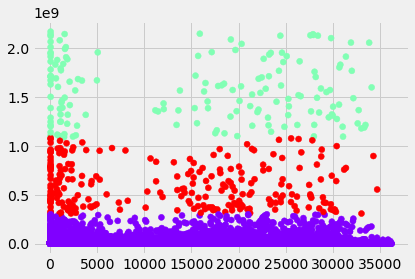

In [143]:
#data = df_clean[["Total_TCP", "Total_RTT", "Total_throughput"]]

data = df_clean[["Avg_TCP", "Average_throughput"]]
kmeans = KMeans(3)
kmeans.fit(data)

identified_clusters = kmeans.fit_predict(data)
identified_clusters

data['Clusters'] = identified_clusters 
plt.scatter(data['Average_throughput'],data['Avg_TCP'],c=data['Clusters'],cmap='rainbow')

## Task 4 - Satisfaction Analysis

#### Based on the engagement analysis + the experience analysis you conducted above ,

##### Task 4. 1 - Write a python program to assign:


* engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

In [204]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 75 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

In [237]:
#cluster_centers_engagement = kmeans.cluster_centers_
cluster_centers_engagement

array([[0.05276127, 0.52219998],
       [0.05256234, 0.20675547],
       [0.05252199, 0.82580008]])

In [238]:
# Stacking two arrays into one 2D array so that wewill use the combined array to do euclidian calculation
position = np.vstack((df_clean['Dur. (ms)'], df_clean['Total_Data'])).T  # np.column_stack((data['Avg_TCP'], data['Average_throughput']))
position

array([[1.82365200e+06, 3.45629377e+08],
       [1.36510400e+06, 7.07185356e+08],
       [1.36176200e+06, 3.07690973e+08],
       ...,
       [9.82490000e+04, 6.27698629e+08],
       [9.79100000e+04, 4.01522016e+08],
       [1.04608560e+05, 4.95764636e+08]])

In [239]:
# Using linalg.norm because the Euclidean distance is the l2 norm, and the default value of the ord parameter in numpy.linalg.norm is 2.
# Source: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
distances = []
for i in range (position.shape[0]):
    dist = np.linalg.norm(position[i] - cluster_centers[0])
    distances.append(dist)

In [241]:
df_clean["engagement_score"] = distances   # Merging distances which represent experience score of the users to the dataset
df_clean.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18    770.00 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04    235.00 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11      1.00 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25    486.00 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23    565.00 2019-04-25 10:40:32   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0 35,521,209,507,511.00   9164566995485190            42.00             5.00   
1 35,794,009,006,359.00            L77566A            65.00             5.00   
2 35,281,510,359,387.00            D42335A           109.80            17.66   
3 35,356,610,164,913.00            T21824A           109.80            17.66   
4 35,407,009,745,539.00            D88865A           109.80            17.66   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                    23.00                    44.00   
1                    16.00                    26.00   
2                     6.00                     9.00   
3                    44.00                    44.00   
4                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                20,809,914.27                   759,658.66   
1                20,809,914.27                   759,658.66   
2                20,809,914.27                   759,658.66   
3                20,809,914.27                   759,658.66   
4                20,809,914.27                   759,658.66   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00   114,471,023.70     3,242,301.38   
1                  0.00   114,471,023.70     3,242,301.38   
2                  0.00   114,471,023.70     3,242,301.38   
3                  0.00   114,471,023.70     3,242,301.38   
4                  0.00   114,471,023.70     3,242,301.38   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00                  37,882.00 1,321,509


* experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 

In [150]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[8.13587510e+06, 4.83141764e+03],
       [1.56599992e+09, 1.50403333e+04],
       [6.02256284e+08, 1.28464816e+04]])

In [249]:
df_clean["Clusters_experience"] = data["Clusters"]

In [246]:
# Stacking two arrays into one 2D array so that wewill use the combined array to do euclidian calculation
position = np.vstack((df_clean['Avg_TCP'], df_clean['Average_throughput'])).T  # np.column_stack((data['Avg_TCP'], data['Average_throughput']))
position

array([[1.07847865e+07, 3.35000000e+01],
       [1.07847865e+07, 2.10000000e+01],
       [1.07847865e+07, 7.50000000e+00],
       ...,
       [1.07847865e+07, 4.50000000e+01],
       [1.07847865e+07, 3.55000000e+01],
       [1.07847865e+07, 7.53523729e+03]])

In [247]:
# Using linalg.norm because the Euclidean distance is the l2 norm, and the default value of the ord parameter in numpy.linalg.norm is 2.
# Source: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
distances = []
for i in range (position.shape[0]):
    dist = np.linalg.norm(position[i] - cluster_centers[0])
    distances.append(dist)

In [250]:
df_clean["experience_score"] = distances   # Merging distances which represent experience score of the users to the dataset
df_clean.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18    770.00 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04    235.00 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11      1.00 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25    486.00 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23    565.00 2019-04-25 10:40:32   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0 35,521,209,507,511.00   9164566995485190            42.00             5.00   
1 35,794,009,006,359.00            L77566A            65.00             5.00   
2 35,281,510,359,387.00            D42335A           109.80            17.66   
3 35,356,610,164,913.00            T21824A           109.80            17.66   
4 35,407,009,745,539.00            D88865A           109.80            17.66   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                    23.00                    44.00   
1                    16.00                    26.00   
2                     6.00                     9.00   
3                    44.00                    44.00   
4                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                20,809,914.27                   759,658.66   
1                20,809,914.27                   759,658.66   
2                20,809,914.27                   759,658.66   
3                20,809,914.27                   759,658.66   
4                20,809,914.27                   759,658.66   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00   114,471,023.70     3,242,301.38   
1                  0.00   114,471,023.70     3,242,301.38   
2                  0.00   114,471,023.70     3,242,301.38   
3                  0.00   114,471,023.70     3,242,301.38   
4                  0.00   114,471,023.70     3,242,301.38   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00                  37,882.00 1,321,509

Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 


In [263]:
df_clean["satisfaction_score"] = df_clean[["engagement_score", "experience_score"]].mean(axis=1)


In [262]:
df_clean.groupby("MSISDN/Number")['satisfaction_score'].mean().reset_index().sort_values(['satisfaction_score'], ascending=False).head(10)

MSISDN/Number  satisfaction_score
31942 33,658,633,234.00    1,464,823,139.99
64113 33,666,824,231.00    1,408,485,144.17
58026 33,664,907,178.00    1,372,254,188.86
32273 33,658,706,088.00    1,326,058,210.46
62049 33,666,125,485.00    1,299,911,989.33
50512 33,662,890,261.00    1,298,582,370.80
66621 33,667,660,489.00    1,283,996,328.27
85785 33,698,575,965.00    1,254,331,641.29
43629 33,661,305,358.00    1,238,090,256.07
48341 33,662,396,708.00    1,223,021,636.04

In finding the top 10 most satisfied customers, I prefered to use mean instead of sum of satisfaction, as sum may be misleading when a customer came many times but experiencing bad services and once we do just summation, those bad experiences will be considered as good thing which is contrally to the truth.

In [275]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [285]:
df_clean["HandsetManufacturerCode"] = df_clean["Handset Manufacturer"].astype('category').cat.codes
df_clean["HandsetTypeCode"] = df_clean["Handset Type"].astype('category').cat.codes
df_clean

Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18    770.00   
1       13114483482878900224 2019-04-09 13:04:04    235.00   
2       13114483484080500736 2019-04-09 17:42:11      1.00   
3       13114483485442799616 2019-04-10 00:31:25    486.00   
4       13114483499480700928 2019-04-12 20:10:23    565.00   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42    451.00   
149997   7349883264234609664 2019-04-29 07:28:42    483.00   
149998  13114483573367300096 2019-04-29 07:28:43    283.00   
149999  13114483573367300096 2019-04-29 07:28:43    696.00   
150000                                       NaT    499.19   

                       End  End ms    Dur. (ms)                   IMSI  \
0      2019-04-25 14:35:31  662.00 1,823,652.00 208,201,448,079,117.00   
1      2019-04-25 08:15:48  606.00 1,365,104.00 208,201,909,211,140.00   
2      2019-04-25 11:58:13  652.00 1,361,762.00 208,200,314,458,056.00   
3      2019-04-25 07:36:35  171.00 1,321,509.00 208,201,402,342,131.00   
4      2019-04-25 10:40:32  954.00 1,089,009.00 208,201,401,415,120.00   
...                    ...     ...          ...                    ...   
149996 2019-04-30 06:02:33  214.00    81,230.00 208,202,201,200,072.00   
149997 2019-04-30 10:41:33  187.00    97,970.00 208,201,908,153,249.00   
149998 2019-04-30 10:46:12  810.00    98,249.00 208,201,711,161,187.00   
149999 2019-04-30 10:40:34  327.00    97,910.00 208,202,101,098,075.00   
150000                 NaT  498.80   104,608.56 208,201,639,651,672.22   

           MSISDN/Number                  IMEI Last Location Name  \
0      33,664,962,239.00 35,521,209,507,511.00   9164566995485190   
1      33,681,854,413.00 35,794,009,006,359.00            L77566A   
2      33,760,627,129.00 35,281,510,359,387.00            D42335A   
3      33,750,343,200.00 35,356,610,164,913.00            T21824A   
4      33,699,795,932.00 35,407,009,745,539.00            D88865A   
...                  ...                   ...                ...   
149996 33,650,688,697.00 35,483,109,451,938.00            D20434A   
149997 33,663,449,963.00 35,660,508,296,467.00            D10223C   
149998 33,621,890,103.00 35,721,209,870,907.00            T51102A   
149999 33,619,622,058.00 86,186,204,011,457.00            L88342B   
150000 41,882,819,545.03 48,474,547,977,654.16                NaN   

        Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0                 42.00             5.00                    23.00   
1                 65.00             5.00                    16.00   
2                109.80            17.66                     6.00   
3                109.80            17.66                    44.00   
4                109.80            17.66                     6.00   
...                 ...              ...                      ...   
149996            32.00             0.00                    52.00   
149997            27.00             2.00                    23.00   
149998            43.00             6.00                    43.00   
149999            37.00             5.00                    34.00   
150000           109.80            17.66                13,300.05   

        Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                         44.00                20,809,914.27   
1                         26.00                20,809,914.27   
2                          9.00                20,809,914.27   
3                         44.00                20,809,914.27   
4                          9.00                20,809,914.27   
...                         ...                          ...   
149996                    65.00                20,809,914.27   
149997                    54.00                20,809,914.27   
149998                    47.00                20,809,914.27   
149999                    37.00                20,809,914.27   
150000                 

Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer. 


In [364]:
X_raw = df_clean[['Dur. (ms)','Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'HandsetManufacturerCode',
       'HandsetTypeCode', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)', 'Decile_rank', 'Total_Data',
       'Dur. (ms)_Norm', 'Total_Data_Norm', 'Bearer Id_Count', 'Clusters',
       'Total_Smedia', 'Total_Google', 'Total_Email', 'Total_Youtube',
       'Total_Netflix', 'Total_Gaming', 'Total_Other', 'Avg_TCP',
       'Average_RTT', 'Average_throughput', 'Total_TCP', 'Total_RTT',
       'Total_throughput', 'Clusters_engagement', 'engagement_score',
       'Clusters_experience', 'experience_score']]

In [365]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
y = df_clean["satisfaction_score"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X_raw, y)


In [366]:
X_selected

array([[2.78082303e+08, 3.08879636e+08, 3.45629377e+08, ...,
        3.45682182e+08, 1.00000000e+00, 2.64891571e+06],
       [6.08750074e+08, 6.53384965e+08, 7.07185356e+08, ...,
        7.07212937e+08, 0.00000000e+00, 2.64891574e+06],
       [2.29584621e+08, 2.79807335e+08, 3.07690973e+08, ...,
        3.07760703e+08, 2.00000000e+00, 2.64891576e+06],
       ...,
       [5.53539484e+08, 5.92786405e+08, 6.27698629e+08, ...,
        6.27745256e+08, 1.00000000e+00, 2.64891569e+06],
       [3.52536971e+08, 3.71895920e+08, 4.01522016e+08, ...,
        4.01597632e+08, 2.00000000e+00, 2.64891571e+06],
       [4.22044703e+08, 4.54643430e+08, 4.95764636e+08, ...,
        4.95824854e+08, 0.00000000e+00, 2.64891275e+06]])

In [367]:
X = X_selected

In [368]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([ 7.63225255e-16, -1.71613625e-15, -1.33691928e-14,  3.46888984e-17,
       -8.55617035e-09, -3.54032703e-16, -9.56392979e-09,  5.00000000e-01,
        2.53225928e-10,  5.00000000e-01])

In [369]:
r_sq = reg.score(X_test, y_test)
r_sq

1.0

Task 4.4 - Run a k-means (k=2) on the engagement & the experience score . 


In [370]:
data = df_clean[["engagement_score", "experience_score"]]

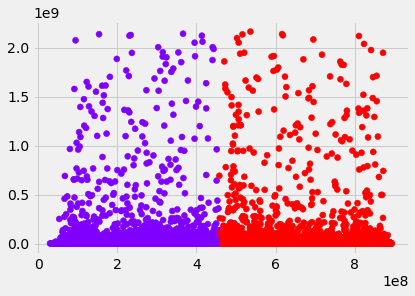

In [372]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(data)

identified_clusters = kmeans.fit_predict(data)
identified_clusters
df_clean['Clusters_engage_exp'] = identified_clusters   # Adding clusters to main dataset
plt.scatter(df_clean['engagement_score'],df_clean['experience_score'],c=df_clean['Clusters_engage_exp'],cmap='rainbow')

Task 4.5 - Aggregate the average satisfaction & experience score per cluster. 


In [373]:
df_clean.groupby("Clusters_engage_exp")['satisfaction_score'].mean().reset_index().sort_values(['satisfaction_score'], ascending=False)

Clusters_engage_exp  satisfaction_score
1                    1      328,942,930.83
0                    0      135,838,426.39

In [374]:
df_clean.groupby("Clusters_engage_exp")['experience_score'].mean().reset_index().sort_values(['experience_score'], ascending=False)

Clusters_engage_exp  experience_score
0                    0      8,014,369.84
1                    1      7,797,867.65

Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 


In [375]:
df_clean_export = df_clean[["MSISDN/Number",  'engagement_score', 'experience_score', 'satisfaction_score']]
df_clean_export

MSISDN/Number  engagement_score  experience_score  \
0      33,664,962,239.00    345,682,181.59      2,648,915.71   
1      33,681,854,413.00    707,212,936.60      2,648,915.74   
2      33,760,627,129.00    307,760,703.03      2,648,915.76   
3      33,750,343,200.00    499,206,809.12      2,648,915.70   
4      33,699,795,932.00    607,717,429.38      2,648,915.76   
...                  ...               ...               ...   
149996 33,650,688,697.00    631,850,619.79      2,648,915.67   
149997 33,663,449,963.00    705,824,862.74      2,648,915.71   
149998 33,621,890,103.00    627,745,256.42      2,648,915.69   
149999 33,619,622,058.00    401,597,632.46      2,648,915.71   
150000 41,882,819,545.03    495,824,853.60      2,648,912.75   

        satisfaction_score  
0           174,165,548.65  
1           354,930,926.17  
2           155,204,809.40  
3           250,927,862.41  
4           305,183,172.57  
...                    ...  
149996      317,249,767.73  
149997      354,236,889.22  
149998      315,197,086.06  
149999      202,123,274.09  
150000      249,236,883.18  

[150001 rows x 4 columns]

In [396]:
import sqlalchemy

In [405]:
engine = sqlalchemy.create_engine('mysql+pymysql://root:Tuyishime123!@#@localhost:3306/telecom')

In [406]:
df_clean_export.to_sql(
    name = 'df_clean_export', 
    con=engine,
    index=False,
    if_exists="append"
)

Task 4.7 Model deployment tracking- deploy the model and monitor your model. 

* Here you can use Docker or other MlOps tools which can help you to track your model’s change.  Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence) and artifacts or any output file regarding each specific run. (CSV file, screenshot)